# 세미프로젝트 파일정리

1. 22년 분기(1~4), 서울시 자치구, 외식 업종, 매출등급 전처리 
2. 위 데이터(키)와 개폐업, 생존율, 최신영업기간 데이터 결합 및 전처리
3. 위 데이터(키,개폐업 등)와 매출 데이터 결합 및 전처리
4. 타입변경, 문자제거 전처리
5. 탐색적 데이터 분석 및 시각화 (EDA)
6. 머신러닝 적용을 위한 주요 데이터 인코딩 전처리
7. 머신러닝 모델링 

# 5. 탐색적 데이터 분석 및 시각화 (EDA)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import font_manager

f_path = "C:\Windows\Fonts\Malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc

rc('font', family='Malgun Gothic')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)
sns.set_style('whitegrid', {'font.family':'Malgun Gothic'})
import matplotlib.ticker as mticker

In [3]:
추정매출 = pd.read_csv("./서울시 상권분석서비스(상권-추정매출2022).csv", dtype = {'분기당_매출_금액' : 'int64'},  encoding = "ansi")
생활인구 = pd.read_csv("./서울시 상권분석서비스(상권-생활인구2022).csv", encoding = "ansi")
직장인구 = pd.read_csv("./서울시 상권분석서비스(상권-직장인구2022).csv", encoding = "ansi")
상권영역 = pd.read_csv("./서울시 상권분석서비스(상권영역).csv", encoding = "ansi")
법정동코드 = pd.read_csv("./서울시 건축물대장 법정동 코드정보.csv", encoding = "ansi")
매출등급 = pd.read_csv("./필지단위 소상공인 매출등급 정보.csv", encoding = "ansi")
코드변환 = pd.read_csv("./A_CS 코드변환.txt")
분기_업종_구_등급 = pd.read_csv("./년도_업종_구_등급.csv", encoding = "ansi")
등급_개폐업율추가 = pd.read_csv("등급_개폐업율추가.csv", encoding = "ansi")
등급_개폐업_매출추가 = pd.read_csv("기본df_매출df_합.csv", encoding = "ansi")

# 전처리 후 csv 추가 파일
전처리_타입변경_문자제거 = pd.read_csv(".전처리_타입변경_문자제거.csv", encoding = "ansi")

# EDA

In [4]:
전처리_타입변경_문자제거

,Unnamed: 0,Unnamed: 0.1,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,시군구_코드,업종별_점포당_매출_금액
0,0,0,202203,강남구,CS100001,한식,3.607718,1,116,145,...,3665.0,0.0,971.0,2520.0,1320.0,763.0,502,5.0,11680,9.851762e+07
1,1,1,202203,강남구,CS100001,한식,3.607718,1,116,145,...,45424.0,411.0,22326.0,36148.0,25579.0,19526.0,13097,90.0,11680,7.882209e+07
2,2,2,202203,강남구,CS100001,한식,3.607718,1,116,145,...,13583.0,1904.0,2851.0,6489.0,11369.0,8908.0,2904,33.0,11680,4.408173e+07
3,3,3,202203,강남구,CS100001,한식,3.607718,1,116,145,...,37861.0,516.0,25510.0,36477.0,22180.0,13662.0,6316,91.0,11680,5.280214e+07
4,4,4,202203,강남구,CS100001,한식,3.607718,1,116,145,...,198873.0,5225.0,92276.0,142044.0,117282.0,100271.0,67313,252.0,11680,9.441766e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35848,35848,35848,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,852.0,0.0,302.0,712.0,139.0,307.0,488,3.0,11260,6.372488e+06
35849,35849,35849,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,13598.0,1743.0,10178.0,4626.0,4976.0,4563.0,654,16.0,11260,9.036580e+06
35850,35850,35850,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,1713.0,9.0,324.0,207.0,594.0,939.0,450,7.0,11260,1.938422e+06
35851,35851,35851,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,2057.0,15.0,1263.0,872.0,366.0,244.0,91,11.0,11260,3.272727e+06


In [5]:
df3=전처리_타입변경_문자제거
df3

,Unnamed: 0,Unnamed: 0.1,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,시군구_코드,업종별_점포당_매출_금액
0,0,0,202203,강남구,CS100001,한식,3.607718,1,116,145,...,3665.0,0.0,971.0,2520.0,1320.0,763.0,502,5.0,11680,9.851762e+07
1,1,1,202203,강남구,CS100001,한식,3.607718,1,116,145,...,45424.0,411.0,22326.0,36148.0,25579.0,19526.0,13097,90.0,11680,7.882209e+07
2,2,2,202203,강남구,CS100001,한식,3.607718,1,116,145,...,13583.0,1904.0,2851.0,6489.0,11369.0,8908.0,2904,33.0,11680,4.408173e+07
3,3,3,202203,강남구,CS100001,한식,3.607718,1,116,145,...,37861.0,516.0,25510.0,36477.0,22180.0,13662.0,6316,91.0,11680,5.280214e+07
4,4,4,202203,강남구,CS100001,한식,3.607718,1,116,145,...,198873.0,5225.0,92276.0,142044.0,117282.0,100271.0,67313,252.0,11680,9.441766e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35848,35848,35848,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,852.0,0.0,302.0,712.0,139.0,307.0,488,3.0,11260,6.372488e+06
35849,35849,35849,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,13598.0,1743.0,10178.0,4626.0,4976.0,4563.0,654,16.0,11260,9.036580e+06
35850,35850,35850,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,1713.0,9.0,324.0,207.0,594.0,939.0,450,7.0,11260,1.938422e+06
35851,35851,35851,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,2057.0,15.0,1263.0,872.0,366.0,244.0,91,11.0,11260,3.272727e+06


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35853 entries, 0 to 35852
Columns: 101 entries, Unnamed: 0 to 업종별_점포당_매출_금액
dtypes: float64(59), int64(35), object(7)
memory usage: 27.6+ MB


In [7]:
df3.groupby(['데이터기준년월', '시군구명', '서비스업종'])['분기당_매출_금액'].sum().to_frame()

분기당_매출_금액
데이터기준년월 시군구명 서비스업종              
202203  강남구  기타 외국식  62107514278
             분식      64838269822
             일식      60668872725
             제과제빵    30124396041
             주점      32378968345
...                          ...
202212  중랑구  중식       2656358742
             치킨       2461635396
             커피       6827683669
             패스트푸드    4240745881
             한식      84450280459

[1000 rows x 1 columns]

In [8]:
df3.groupby(['데이터기준년월','서비스업종'])['분기당_매출_금액'].sum().to_frame()

분기당_매출_금액
데이터기준년월 서비스업종                
202203  기타 외국식   284033290504
        분식       419798236631
        일식       248690708746
        제과제빵     287313419252
        주점       316051849741
        중식       234380346010
        치킨        90196068374
        커피       619676567675
        패스트푸드    142259221841
        한식      2501244203332
202206  기타 외국식   378702306057
        분식       531475368313
        일식       315416994748
        제과제빵     306206564801
        주점       603796534563
        중식       290078557038
        치킨       141929493650
        커피       800025172537
        패스트푸드    164829337266
        한식      3413128288775
202209  기타 외국식   376262268290
        분식       537915526682
        일식       306872840111
        제과제빵     301680306746
        주점       580754755953
        중식       295515804702
        치킨       138198927021
        커피       803701129006
        패스트푸드    168202668650
        한식      3324699476189
202212  기타 외국식   392379578777
        분식       564937893037
        일식       333069900387
        제과제빵     306393415269
        주점       574159574707
        중식       324112355414
        치킨       136787749429
        커피       789886145520
        패스트푸드    161997311973
        한식      3649953585304

In [9]:
df3.groupby(['데이터기준년월','서비스업종'])['분기당_매출_금액'].sum().to_frame().reset_index()

,데이터기준년월,서비스업종,분기당_매출_금액
0,202203,기타 외국식,284033290504
1,202203,분식,419798236631
2,202203,일식,248690708746
3,202203,제과제빵,287313419252
4,202203,주점,316051849741
5,202203,중식,234380346010
6,202203,치킨,90196068374
7,202203,커피,619676567675
8,202203,패스트푸드,142259221841
9,202203,한식,2501244203332


# 업종별 매출 금액

In [10]:
a=df3.groupby('서비스업종')['분기당_매출_금액'].sum().to_frame().reset_index()
a

,서비스업종,분기당_매출_금액
0,기타 외국식,1431377443628
1,분식,2054127024663
2,일식,1204050443992
3,제과제빵,1201593706068
4,주점,2074762714964
5,중식,1144087063164
6,치킨,507112238474
7,커피,3013289014738
8,패스트푸드,637288539730
9,한식,12889025553600


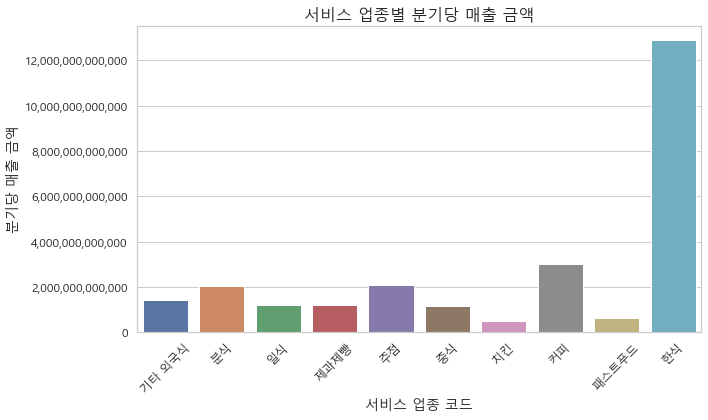

In [11]:
# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
ax = sns.barplot(x='서비스업종', y='분기당_매출_금액', data=a)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 조정
plt.yticks(fontsize=12)  # y축 레이블 폰트 크기 조정

# y축 값 표현을 천의 자리수 단위로 설정
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# x, y축 레이블 및 타이틀 추가
plt.xlabel('서비스 업종 코드', fontsize=14)
plt.ylabel('분기당 매출 금액', fontsize=14)
plt.title('서비스 업종별 분기당 매출 금액', fontsize=16)

# 그래프 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

# 구, 매출금액

In [12]:
df3.groupby('시군구명')['분기당_매출_금액'].sum()

시군구명
강남구     3696138443408
강동구      770061471557
강북구      449559198013
강서구      684196000749
관악구      684959676023
광진구      753263510291
구로구      726006402537
금천구      602255465706
노원구      581902422874
도봉구      309143695085
동대문구     597375942529
동작구      683056456488
마포구     1621388699163
서대문구     549973175935
서초구     2190460445072
성동구      656858457024
성북구      507622282727
송파구     1673153675120
양천구      501734624892
영등포구    1542707939429
용산구     1199298278131
은평구      471611673088
종로구     1931564140554
중구      2294136108876
중랑구      478285557750
Name: 분기당_매출_금액, dtype: int64

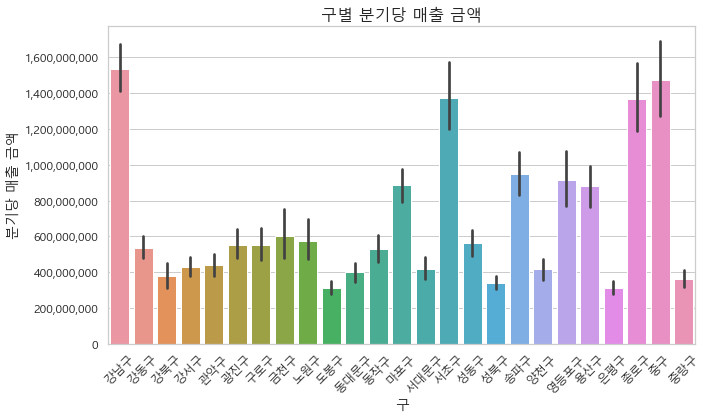

In [13]:
# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
ax = sns.barplot(x='시군구명', y='분기당_매출_금액', data=df3)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 조정
plt.yticks(fontsize=12)  # y축 레이블 폰트 크기 조정

# y축 값 표현을 천의 자리수 단위로 설정
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# x, y축 레이블 및 타이틀 추가
plt.xlabel('구', fontsize=14)
plt.ylabel('분기당 매출 금액', fontsize=14)
plt.title('구별 분기당 매출 금액', fontsize=16)

# 그래프 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

# 강남구 업종별 매출금액

In [14]:
df3.head()

,Unnamed: 0,Unnamed: 0.1,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,시군구_코드,업종별_점포당_매출_금액
0,0,0,202203,강남구,CS100001,한식,3.607718,1,116,145,...,3665.0,0.0,971.0,2520.0,1320.0,763.0,502,5.0,11680,9.851762e+07
1,1,1,202203,강남구,CS100001,한식,3.607718,1,116,145,...,45424.0,411.0,22326.0,36148.0,25579.0,19526.0,13097,90.0,11680,7.882209e+07
2,2,2,202203,강남구,CS100001,한식,3.607718,1,116,145,...,13583.0,1904.0,2851.0,6489.0,11369.0,8908.0,2904,33.0,11680,4.408173e+07
3,3,3,202203,강남구,CS100001,한식,3.607718,1,116,145,...,37861.0,516.0,25510.0,36477.0,22180.0,13662.0,6316,91.0,11680,5.280214e+07
4,4,4,202203,강남구,CS100001,한식,3.607718,1,116,145,...,198873.0,5225.0,92276.0,142044.0,117282.0,100271.0,67313,252.0,11680,9.441766e+07


In [15]:
df3_강남구=df3[df3['시군구명']=='강남구']
df3_강남구

,Unnamed: 0,Unnamed: 0.1,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,시군구_코드,업종별_점포당_매출_금액
0,0,0,202203,강남구,CS100001,한식,3.607718,1,116,145,...,3665.0,0.0,971.0,2520.0,1320.0,763.0,502,5.0,11680,9.851762e+07
1,1,1,202203,강남구,CS100001,한식,3.607718,1,116,145,...,45424.0,411.0,22326.0,36148.0,25579.0,19526.0,13097,90.0,11680,7.882209e+07
2,2,2,202203,강남구,CS100001,한식,3.607718,1,116,145,...,13583.0,1904.0,2851.0,6489.0,11369.0,8908.0,2904,33.0,11680,4.408173e+07
3,3,3,202203,강남구,CS100001,한식,3.607718,1,116,145,...,37861.0,516.0,25510.0,36477.0,22180.0,13662.0,6316,91.0,11680,5.280214e+07
4,4,4,202203,강남구,CS100001,한식,3.607718,1,116,145,...,198873.0,5225.0,92276.0,142044.0,117282.0,100271.0,67313,252.0,11680,9.441766e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34703,34703,34703,202212,강남구,CS100010,커피,3.408815,1,128,65,...,1898.0,17.0,1159.0,1316.0,715.0,496.0,368,9.0,11680,6.111681e+06
34704,34704,34704,202212,강남구,CS100010,커피,3.408815,1,128,65,...,20206.0,420.0,11538.0,11454.0,5458.0,3984.0,1228,18.0,11680,1.660368e+07
34705,34705,34705,202212,강남구,CS100010,커피,3.408815,1,128,65,...,992.0,0.0,315.0,360.0,813.0,1129.0,135,1.5,11680,1.040000e+07
34706,34706,34706,202212,강남구,CS100010,커피,3.408815,1,128,65,...,1772.0,0.0,529.0,1116.0,524.0,385.0,75,1.5,11680,2.552766e+07


In [16]:
a=df3_강남구.groupby('서비스업종')['분기당_매출_금액'].sum().to_frame().reset_index()
a

,서비스업종,분기당_매출_금액
0,기타 외국식,315874024503
1,분식,342166787362
2,일식,283107302594
3,제과제빵,125234959322
4,주점,206962360217
5,중식,223904018345
6,치킨,57884650953
7,커피,472930640613
8,패스트푸드,65287989273
9,한식,1602785710226


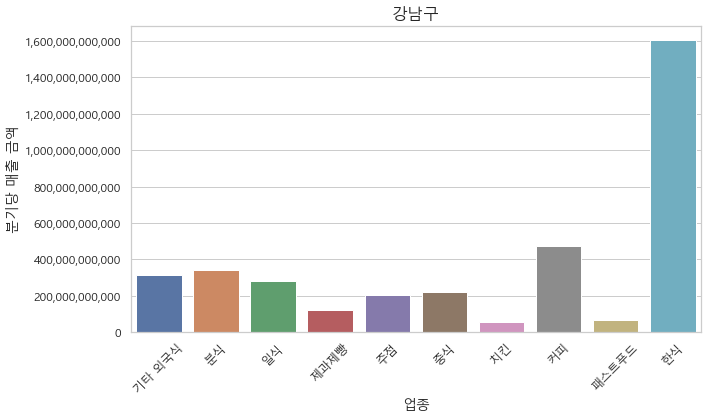

In [17]:
# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
ax = sns.barplot(x='서비스업종', y='분기당_매출_금액', data=a)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 조정
plt.yticks(fontsize=12)  # y축 레이블 폰트 크기 조정

# y축 값 표현을 천의 자리수 단위로 설정
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# x, y축 레이블 및 타이틀 추가
plt.xlabel('업종', fontsize=14)
plt.ylabel('분기당 매출 금액', fontsize=14)
plt.title('강남구', fontsize=16)

# 그래프 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

# 구별, 업종별, 매출금액

In [18]:
df3['시군구명'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

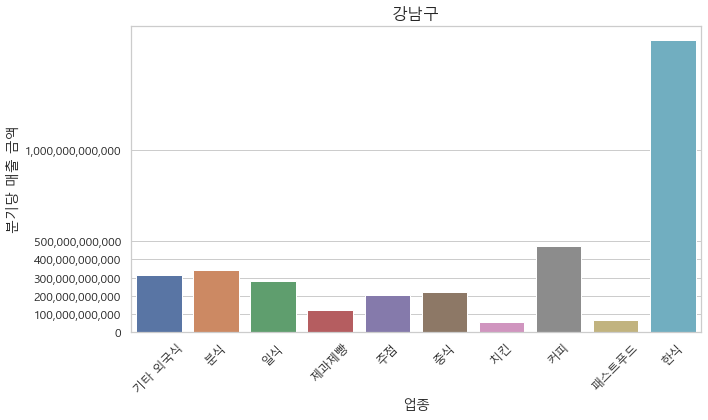

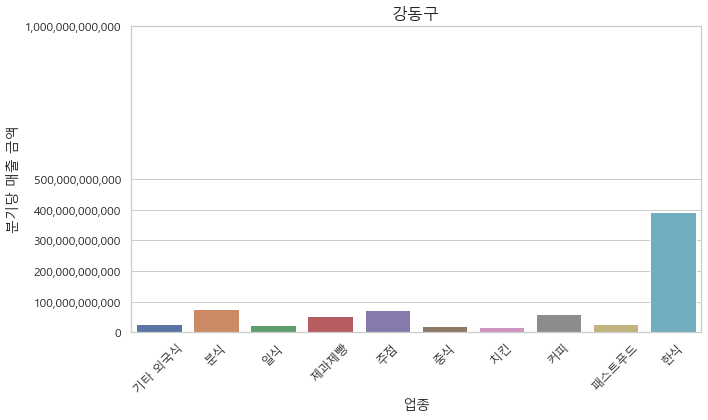

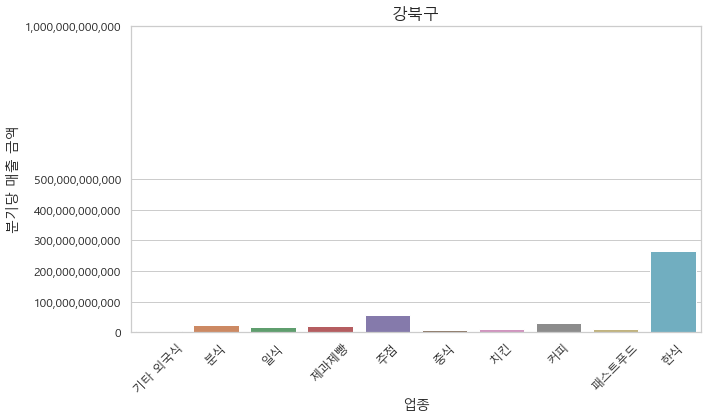

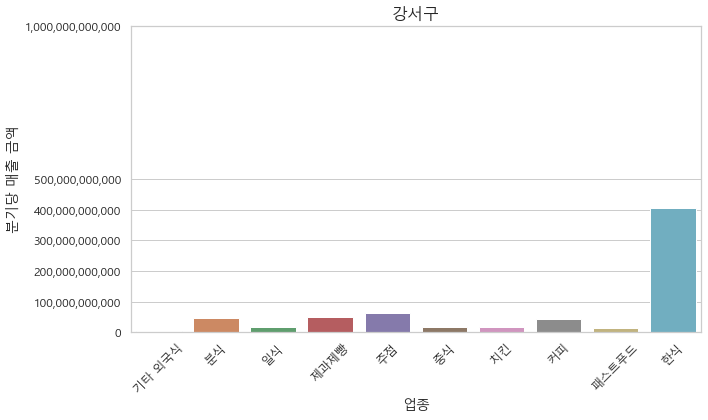

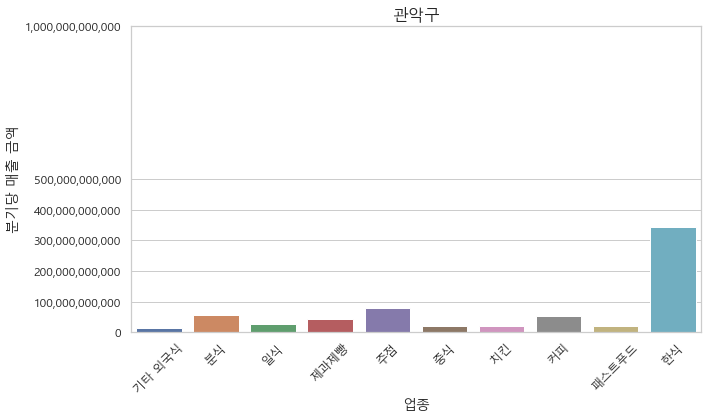

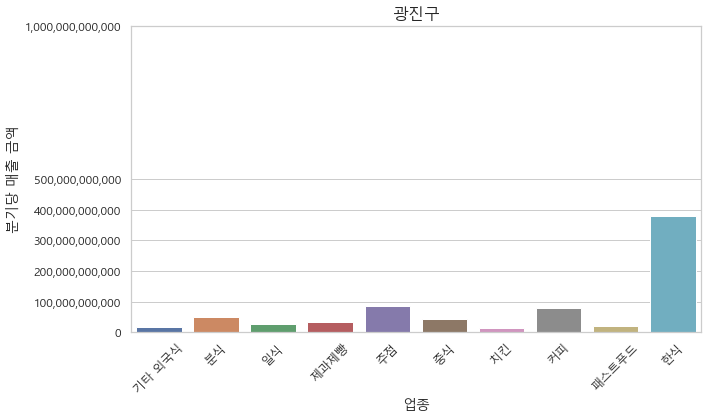

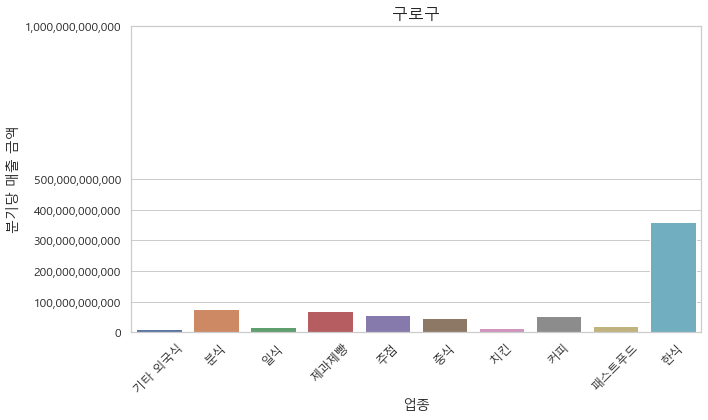

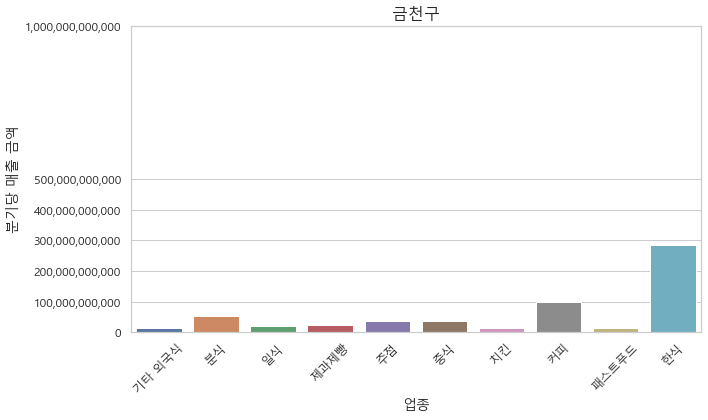

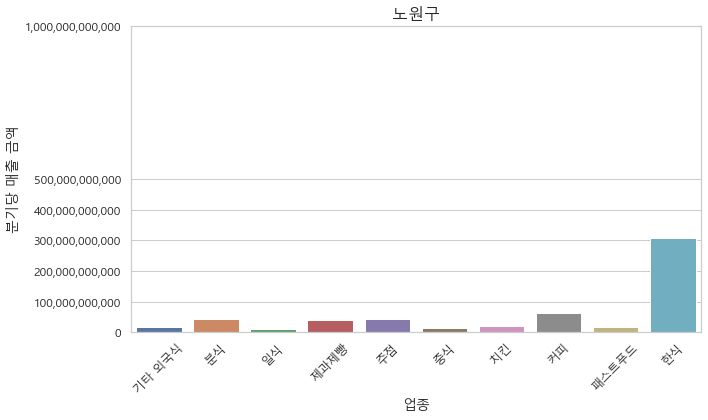

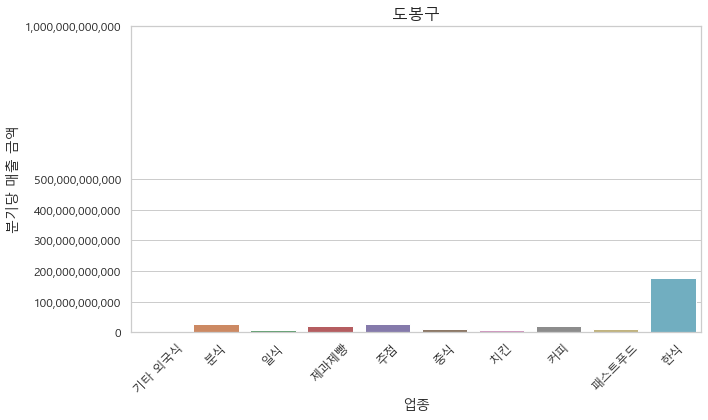

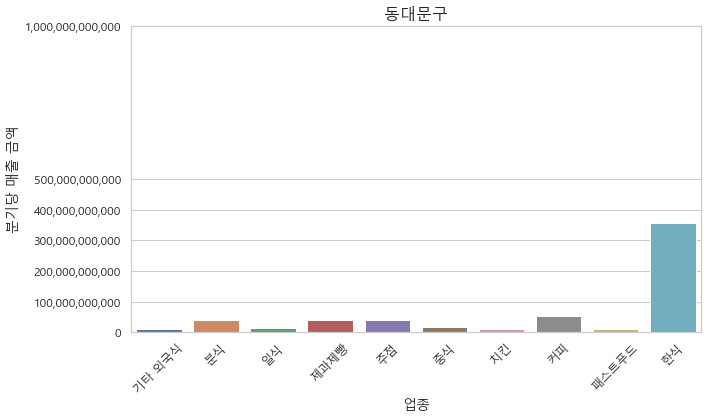

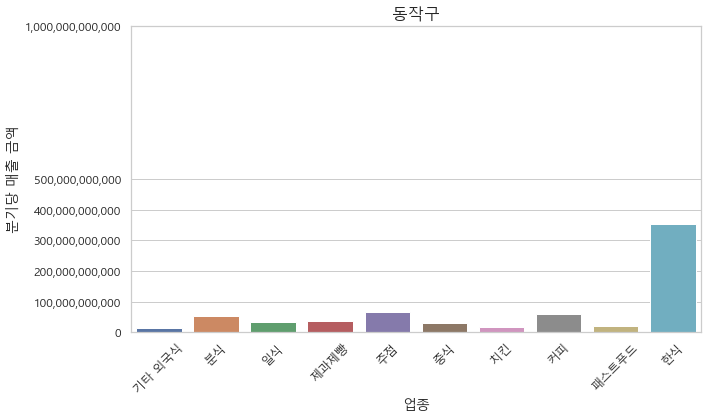

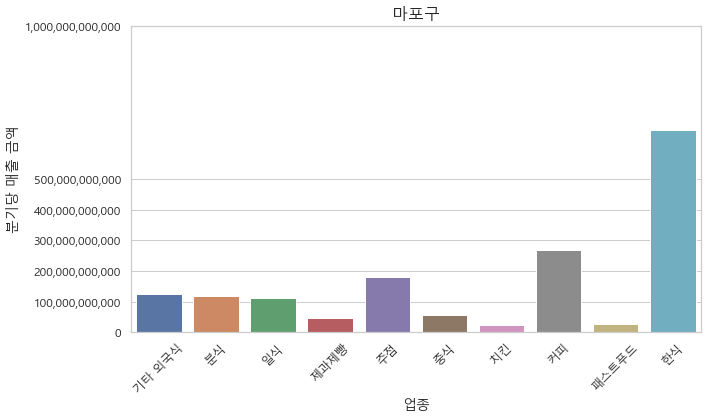

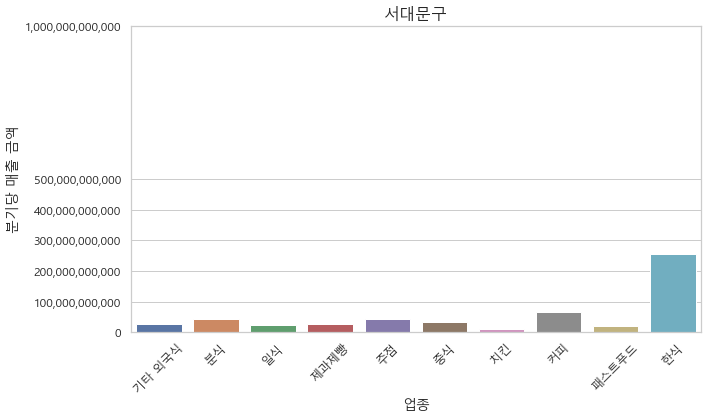

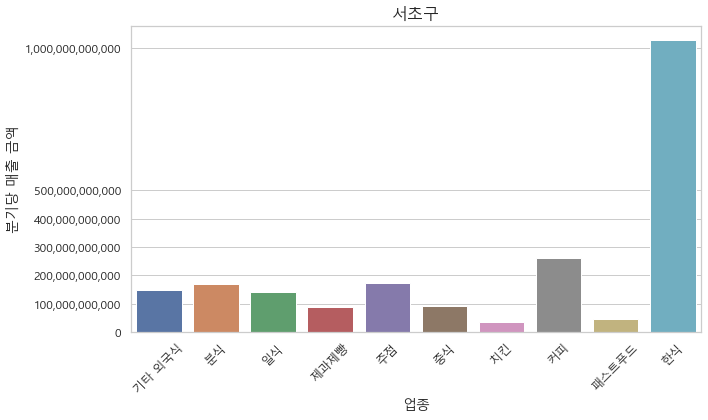

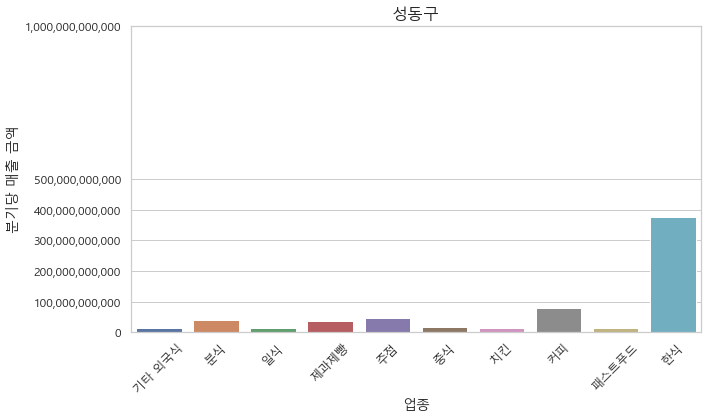

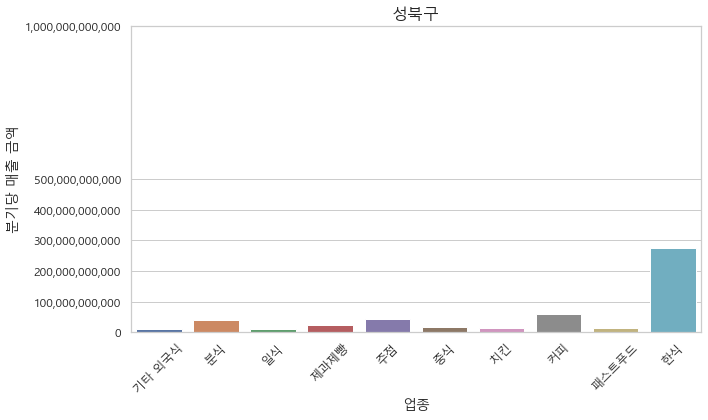

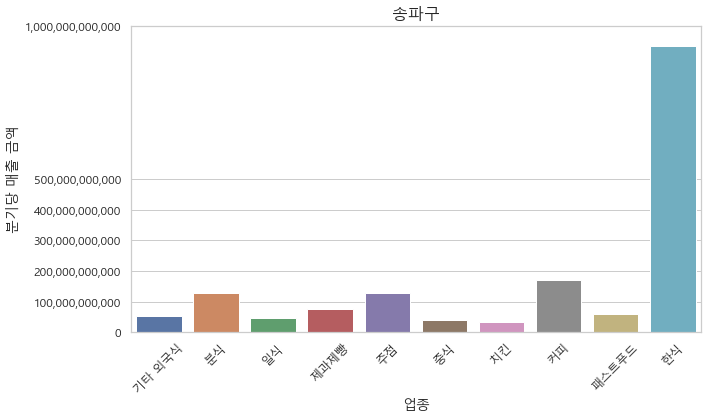

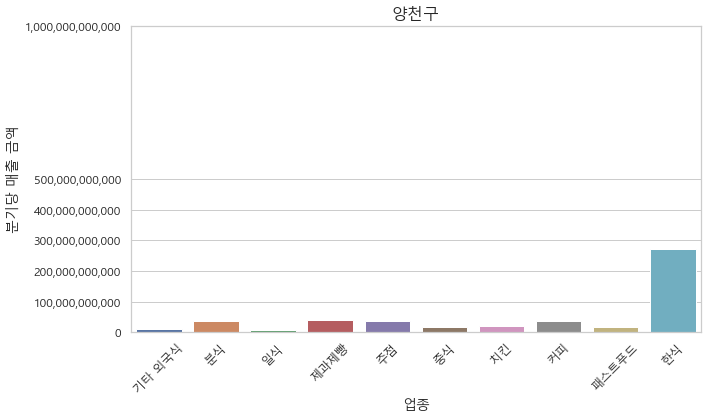

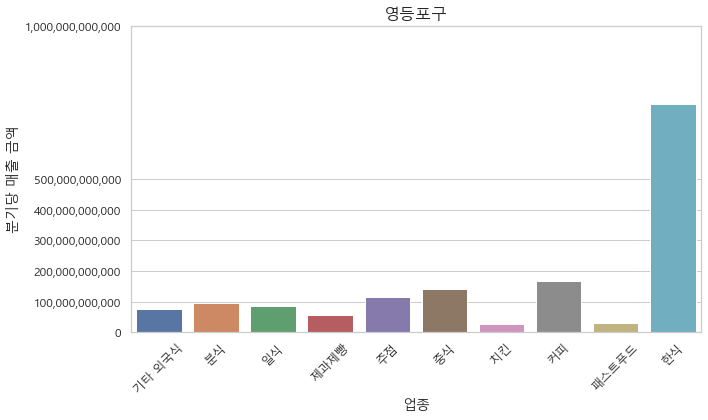

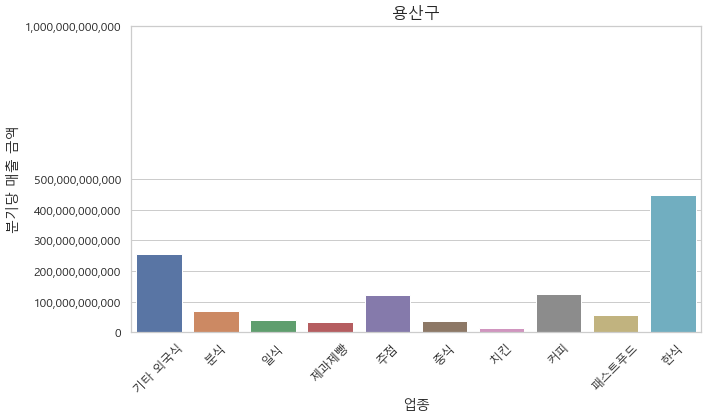

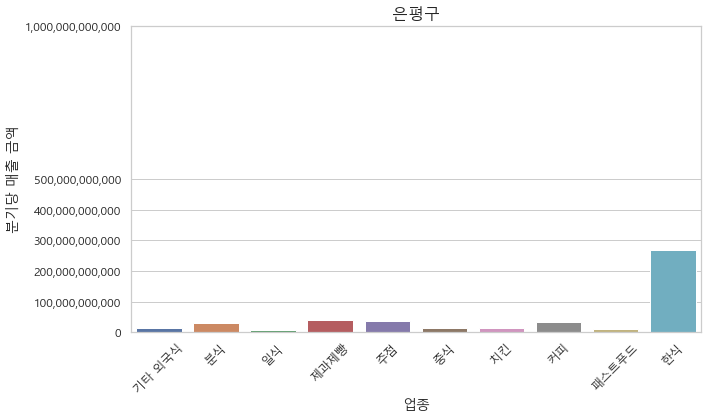

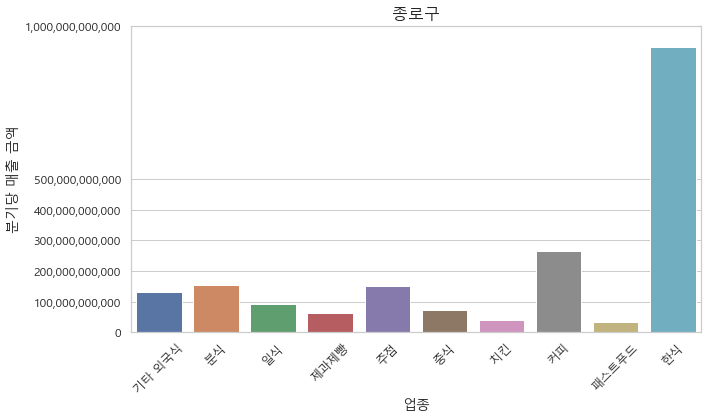

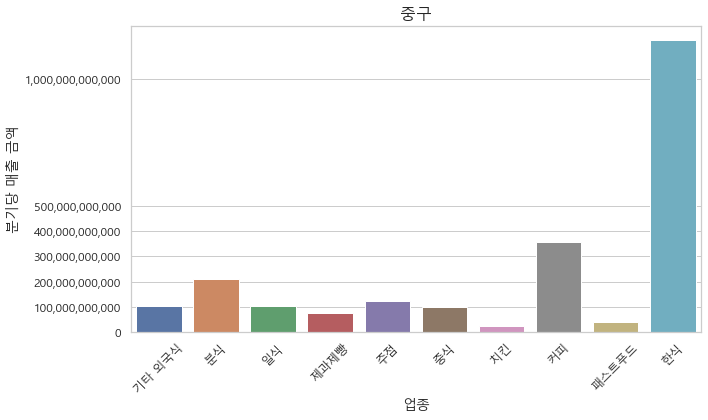

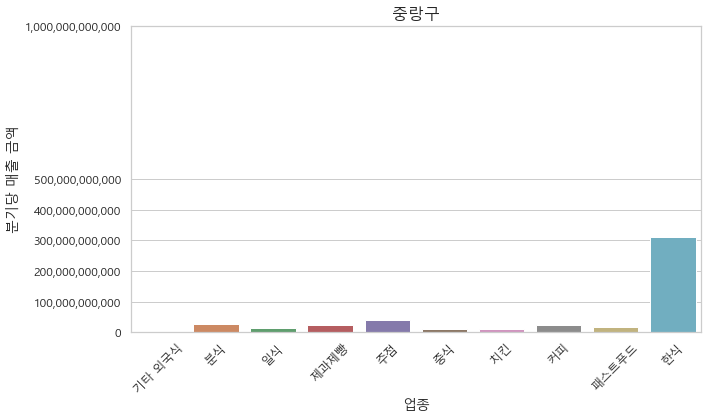

In [19]:
a=['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

for i in a:
    df3_구=df3[df3['시군구명']==i]
    df3_구

    a=df3_구.groupby('서비스업종')['분기당_매출_금액'].sum().to_frame().reset_index()
    a

    # 그래프 그리기
    plt.figure(figsize=(10, 6))  # 그래프 크기 조정
    ax = sns.barplot(x='서비스업종', y='분기당_매출_금액', data=a)
    
    # y축 눈금 고정 설정
    y_ticks = [0,100000000000,200000000000,300000000000,400000000000,500000000000,1000000000000]
    ax.set_yticks(y_ticks)

    # x축 레이블 회전 및 폰트 크기 조정
    plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 조정
    plt.yticks(fontsize=12)  # y축 레이블 폰트 크기 조정

    # y축 값 표현을 천의 자리수 단위로 설정
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
    
    # x, y축 레이블 및 타이틀 추가
    plt.xlabel('업종', fontsize=14)
    plt.ylabel('분기당 매출 금액', fontsize=14)
    plt.title(i, fontsize=16)

    # 그래프 표시
    plt.tight_layout()  # 레이아웃 조정
    plt.show()

# 분기별, 구별, 매출

In [20]:
df3

,Unnamed: 0,Unnamed: 0.1,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,시군구_코드,업종별_점포당_매출_금액
0,0,0,202203,강남구,CS100001,한식,3.607718,1,116,145,...,3665.0,0.0,971.0,2520.0,1320.0,763.0,502,5.0,11680,9.851762e+07
1,1,1,202203,강남구,CS100001,한식,3.607718,1,116,145,...,45424.0,411.0,22326.0,36148.0,25579.0,19526.0,13097,90.0,11680,7.882209e+07
2,2,2,202203,강남구,CS100001,한식,3.607718,1,116,145,...,13583.0,1904.0,2851.0,6489.0,11369.0,8908.0,2904,33.0,11680,4.408173e+07
3,3,3,202203,강남구,CS100001,한식,3.607718,1,116,145,...,37861.0,516.0,25510.0,36477.0,22180.0,13662.0,6316,91.0,11680,5.280214e+07
4,4,4,202203,강남구,CS100001,한식,3.607718,1,116,145,...,198873.0,5225.0,92276.0,142044.0,117282.0,100271.0,67313,252.0,11680,9.441766e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35848,35848,35848,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,852.0,0.0,302.0,712.0,139.0,307.0,488,3.0,11260,6.372488e+06
35849,35849,35849,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,13598.0,1743.0,10178.0,4626.0,4976.0,4563.0,654,16.0,11260,9.036580e+06
35850,35850,35850,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,1713.0,9.0,324.0,207.0,594.0,939.0,450,7.0,11260,1.938422e+06
35851,35851,35851,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,2057.0,15.0,1263.0,872.0,366.0,244.0,91,11.0,11260,3.272727e+06


In [21]:
a=df3.groupby(['시군구명','데이터기준년월'])['분기당_매출_금액'].sum().to_frame().reset_index()
a

,시군구명,데이터기준년월,분기당_매출_금액
0,강남구,202203,732287279647
1,강남구,202206,969686792341
2,강남구,202209,974670957777
3,강남구,202212,1019493413643
4,강동구,202203,157591054770
...,...,...,...
95,중구,202212,658181875825
96,중랑구,202203,97114255268
97,중랑구,202206,128590350710
98,중랑구,202209,124178435500


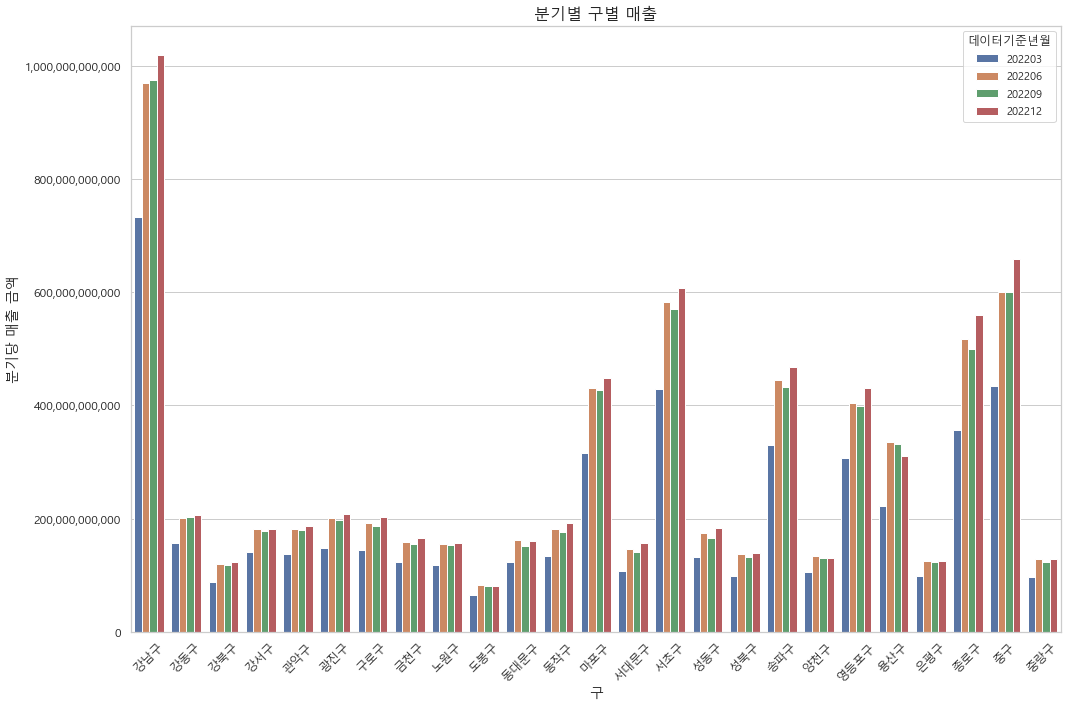

In [22]:
# 그래프 그리기
plt.figure(figsize=(15, 10))  # 그래프 크기 조정
ax = sns.barplot(x='시군구명', y='분기당_매출_금액', hue='데이터기준년월' ,data=a)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 조정
plt.yticks(fontsize=12)  # y축 레이블 폰트 크기 조정

# y축 값 표현을 천의 자리수 단위로 설정
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# x, y축 레이블 및 타이틀 추가
plt.xlabel('구', fontsize=14)
plt.ylabel('분기당 매출 금액', fontsize=14)
plt.title('분기별 구별 매출', fontsize=16)

# 그래프 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

# 분기별, 업종별, 매출

In [23]:
df3.head()

,Unnamed: 0,Unnamed: 0.1,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,시군구_코드,업종별_점포당_매출_금액
0,0,0,202203,강남구,CS100001,한식,3.607718,1,116,145,...,3665.0,0.0,971.0,2520.0,1320.0,763.0,502,5.0,11680,9.851762e+07
1,1,1,202203,강남구,CS100001,한식,3.607718,1,116,145,...,45424.0,411.0,22326.0,36148.0,25579.0,19526.0,13097,90.0,11680,7.882209e+07
2,2,2,202203,강남구,CS100001,한식,3.607718,1,116,145,...,13583.0,1904.0,2851.0,6489.0,11369.0,8908.0,2904,33.0,11680,4.408173e+07
3,3,3,202203,강남구,CS100001,한식,3.607718,1,116,145,...,37861.0,516.0,25510.0,36477.0,22180.0,13662.0,6316,91.0,11680,5.280214e+07
4,4,4,202203,강남구,CS100001,한식,3.607718,1,116,145,...,198873.0,5225.0,92276.0,142044.0,117282.0,100271.0,67313,252.0,11680,9.441766e+07


In [24]:
pd.set_option('display.max_rows', 100)

In [25]:
a=df3.groupby(['서비스업종','데이터기준년월'])['분기당_매출_금액'].sum().to_frame().reset_index()
a

,서비스업종,데이터기준년월,분기당_매출_금액
0,기타 외국식,202203,284033290504
1,기타 외국식,202206,378702306057
2,기타 외국식,202209,376262268290
3,기타 외국식,202212,392379578777
4,분식,202203,419798236631
5,분식,202206,531475368313
6,분식,202209,537915526682
7,분식,202212,564937893037
8,일식,202203,248690708746
9,일식,202206,315416994748


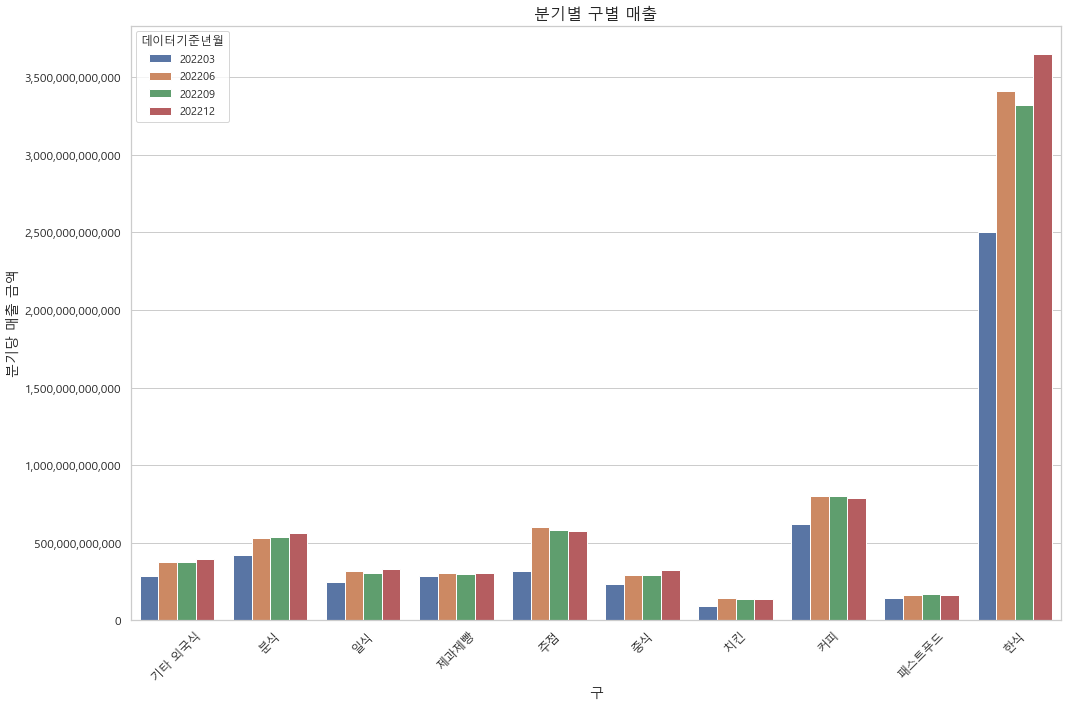

In [26]:
# 그래프 그리기
plt.figure(figsize=(15, 10))  # 그래프 크기 조정
ax = sns.barplot(x='서비스업종', y='분기당_매출_금액', hue='데이터기준년월' ,data=a)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 조정
plt.yticks(fontsize=12)  # y축 레이블 폰트 크기 조정

# y축 값 표현을 천의 자리수 단위로 설정
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# x, y축 레이블 및 타이틀 추가
plt.xlabel('구', fontsize=14)
plt.ylabel('분기당 매출 금액', fontsize=14)
plt.title('분기별 구별 매출', fontsize=16)

# 그래프 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35853 entries, 0 to 35852
Columns: 101 entries, Unnamed: 0 to 업종별_점포당_매출_금액
dtypes: float64(59), int64(35), object(7)
memory usage: 27.6+ MB


# 남녀-업종 매출
# 주중,주말 - 구 매출

In [28]:
a=df3.groupby('서비스업종')[['남성_매출_금액','여성_매출_금액']].sum().reset_index()
a

,서비스업종,남성_매출_금액,여성_매출_금액
0,기타 외국식,5.867773e+11,5.825420e+11
1,분식,9.137766e+11,8.697061e+11
2,일식,5.268804e+11,3.725086e+11
3,제과제빵,4.523537e+11,6.385066e+11
4,주점,1.215723e+12,6.547906e+11
5,중식,5.413534e+11,3.369325e+11
6,치킨,2.866036e+11,1.677001e+11
7,커피,1.179120e+12,1.484342e+12
8,패스트푸드,3.140263e+11,2.600221e+11
9,한식,6.413185e+12,3.790724e+12


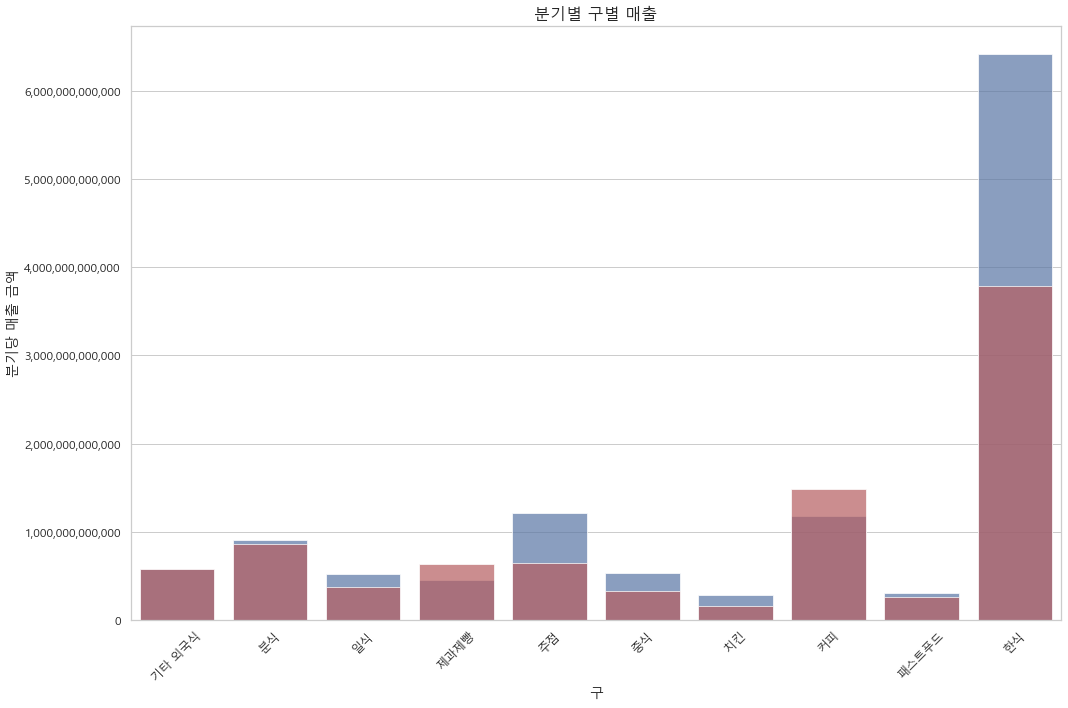

In [29]:
# 그래프 그리기
plt.figure(figsize=(15, 10))  # 그래프 크기 조정
ax1 = sns.barplot(x='서비스업종', y='남성_매출_금액',data=a,color='b',alpha=0.7)
ax2 = sns.barplot(x='서비스업종', y='여성_매출_금액',data=a,color='r',alpha=0.7)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 조정
plt.yticks(fontsize=12)  # y축 레이블 폰트 크기 조정

# y축 값 표현을 천의 자리수 단위로 설정
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# x, y축 레이블 및 타이틀 추가
plt.xlabel('구', fontsize=14)
plt.ylabel('분기당 매출 금액', fontsize=14)
plt.title('분기별 구별 매출', fontsize=16)

# 그래프 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [30]:
# 주중, 주말, 구

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35853 entries, 0 to 35852
Columns: 101 entries, Unnamed: 0 to 업종별_점포당_매출_금액
dtypes: float64(59), int64(35), object(7)
memory usage: 27.6+ MB


In [32]:
a=df3.groupby('시군구명')[['주중_매출_금액','주말_매출_금액']].sum().reset_index()
a

,시군구명,주중_매출_금액,주말_매출_금액
0,강남구,2.889743e+12,8.063955e+11
1,강동구,5.211327e+11,2.489288e+11
2,강북구,2.946954e+11,1.548638e+11
3,강서구,4.844421e+11,1.997539e+11
4,관악구,4.587474e+11,2.262122e+11
5,광진구,5.153707e+11,2.378928e+11
6,구로구,5.368355e+11,1.891709e+11
7,금천구,4.694092e+11,1.328463e+11
8,노원구,3.867957e+11,1.951067e+11
9,도봉구,2.050869e+11,1.040568e+11


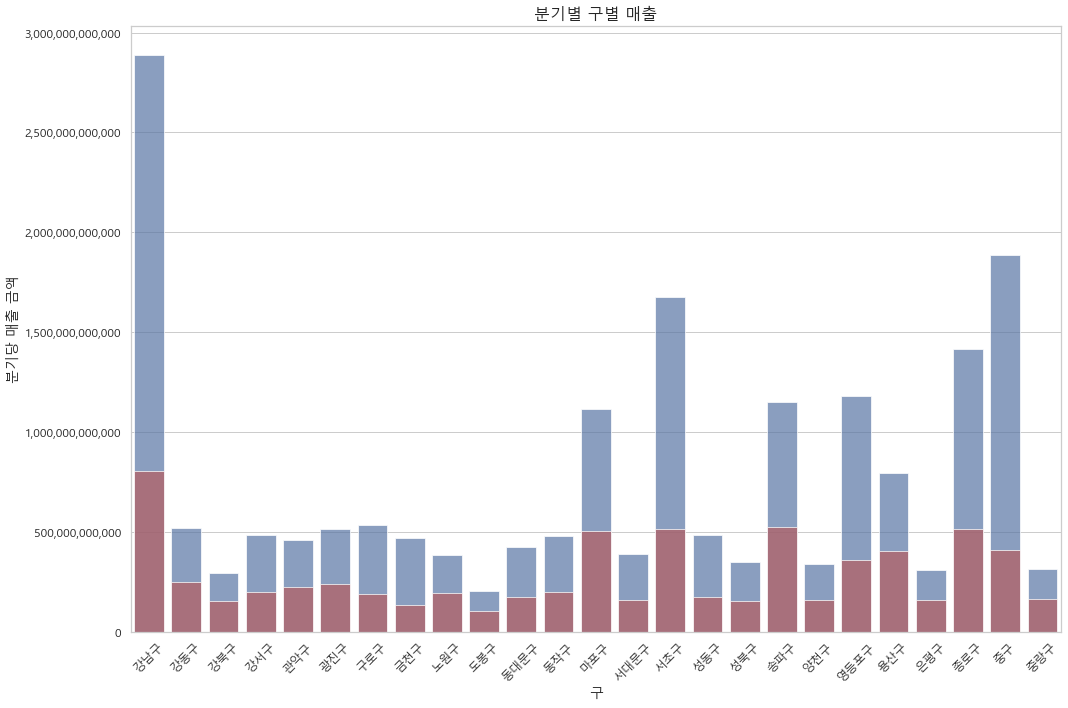

In [33]:
# 그래프 그리기
plt.figure(figsize=(15, 10))  # 그래프 크기 조정
ax1 = sns.barplot(x='시군구명', y='주중_매출_금액',data=a,color='b',alpha=0.7)
ax2 = sns.barplot(x='시군구명', y='주말_매출_금액',data=a,color='r',alpha=0.7)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 조정
plt.yticks(fontsize=12)  # y축 레이블 폰트 크기 조정

# y축 값 표현을 천의 자리수 단위로 설정
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# x, y축 레이블 및 타이틀 추가
plt.xlabel('구', fontsize=14)
plt.ylabel('분기당 매출 금액', fontsize=14)
plt.title('분기별 구별 매출', fontsize=16)

# 그래프 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

# 구별, 요일별, 매출금액

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35853 entries, 0 to 35852
Columns: 101 entries, Unnamed: 0 to 업종별_점포당_매출_금액
dtypes: float64(59), int64(35), object(7)
memory usage: 27.6+ MB


In [35]:
a = df3.groupby('시군구명')[['월요일_매출_금액','화요일_매출_금액','수요일_매출_금액','목요일_매출_금액','금요일_매출_금액','토요일_매출_금액','일요일_매출_금액']].sum().reset_index()
a = a.set_index("시군구명")
a = a.T.reset_index()
a

시군구명,index,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,월요일_매출_금액,4.932903e+11,9.392931e+10,5.403477e+10,8.667584e+10,8.324835e+10,9.221984e+10,9.507589e+10,8.230405e+10,6.940808e+10,...,8.346831e+10,6.246488e+10,2.040314e+11,6.064266e+10,2.096301e+11,1.338131e+11,5.564291e+10,2.405972e+11,3.226354e+11,5.664793e+10
1,화요일_매출_금액,5.648702e+11,9.928414e+10,5.578480e+10,9.351289e+10,8.695572e+10,9.718686e+10,1.026966e+11,9.263506e+10,7.348171e+10,...,9.193242e+10,6.684305e+10,2.178440e+11,6.440806e+10,2.318529e+11,1.459685e+11,5.977233e+10,2.687450e+11,3.758117e+11,5.999459e+10
2,수요일_매출_금액,5.905129e+11,1.029310e+11,5.825926e+10,9.704558e+10,8.965419e+10,1.010765e+11,1.070598e+11,9.405852e+10,7.612071e+10,...,9.650929e+10,7.024289e+10,2.274169e+11,6.750698e+10,2.395409e+11,1.561596e+11,6.179972e+10,2.891359e+11,3.834930e+11,6.123237e+10
3,목요일_매출_금액,6.121652e+11,1.042803e+11,5.781148e+10,9.942096e+10,9.137642e+10,1.036079e+11,1.103416e+11,9.804123e+10,7.713218e+10,...,9.967576e+10,7.163170e+10,2.328170e+11,6.857812e+10,2.472825e+11,1.632778e+11,6.178534e+10,2.953228e+11,4.016695e+11,6.260049e+10
4,금요일_매출_금액,6.289043e+11,1.207079e+11,6.880510e+10,1.077868e+11,1.075128e+11,1.212796e+11,1.216616e+11,1.023703e+11,9.065302e+10,...,1.109037e+11,8.004492e+10,2.677513e+11,7.959634e+10,2.547477e+11,1.949643e+11,7.317188e+10,3.218020e+11,4.019776e+11,7.559090e+10
5,토요일_매출_금액,4.810391e+11,1.384615e+11,8.605840e+10,1.129982e+11,1.259961e+11,1.339645e+11,1.082288e+11,7.552077e+10,1.093971e+11,...,1.012219e+11,8.637133e+10,2.976614e+11,8.948614e+10,2.042175e+11,2.359794e+11,9.009780e+10,3.072011e+11,2.461536e+11,8.983708e+10
6,일요일_매출_금액,3.253564e+11,1.104673e+11,6.880539e+10,8.675578e+10,1.002161e+11,1.039283e+11,8.094206e+10,5.732554e+10,8.570962e+10,...,7.314712e+10,7.002351e+10,2.256315e+11,7.151632e+10,1.554364e+11,1.691354e+11,6.934170e+10,2.087602e+11,1.623953e+11,7.238220e+10


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35853 entries, 0 to 35852
Columns: 101 entries, Unnamed: 0 to 업종별_점포당_매출_금액
dtypes: float64(59), int64(35), object(7)
memory usage: 27.6+ MB


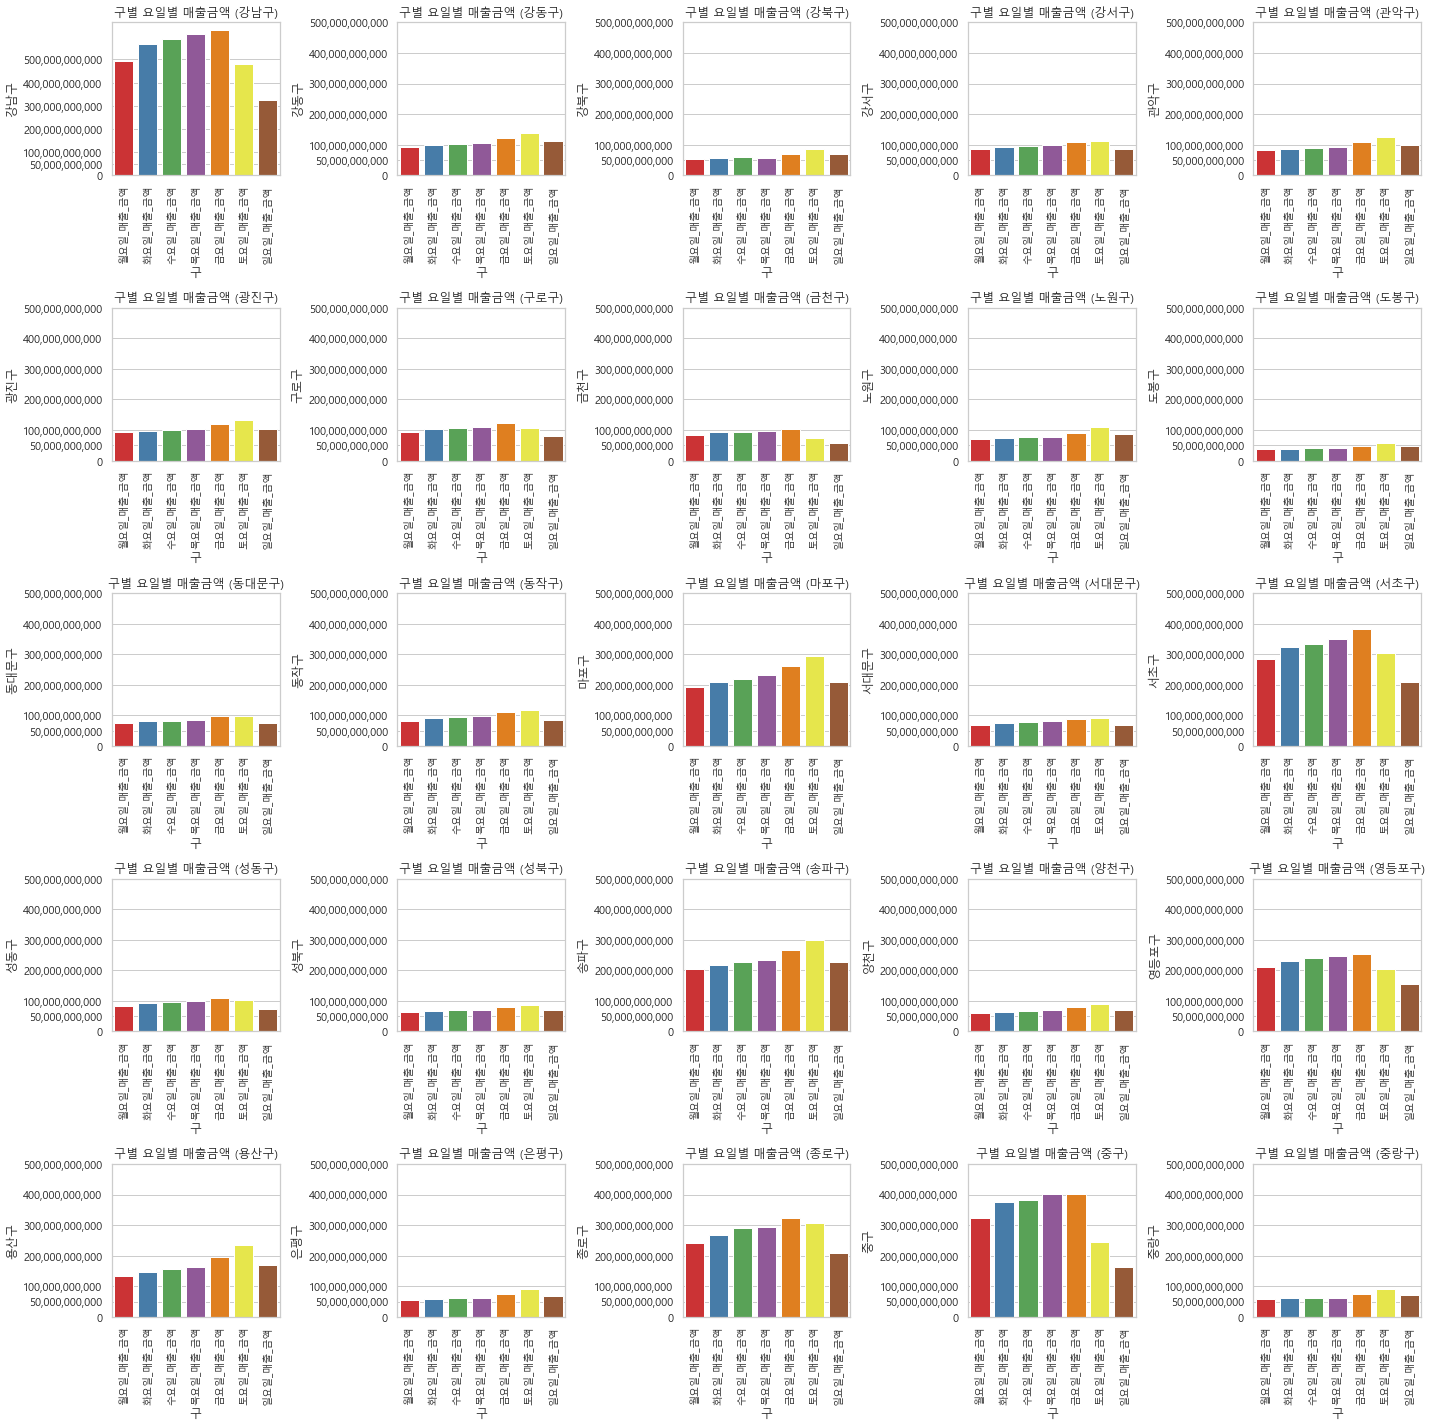

In [37]:
b= a.columns[1:]

# 그래프 그리기
plt.figure(figsize=(20, 20))  # 전체 그래프 크기 조정

for i in range(25):
    ax = plt.subplot(5, 5, i+1)  # 서브플롯 선택
    sns.barplot(x='index', y=b[i], data=a, ci=None, ax=ax, palette="Set1")
    ax.set_title(f'구별 요일별 매출금액 ({b[i]})')
    ax.set_xlabel('구', fontsize=12)
    ax.set_ylabel(f'{b[i]}', fontsize=12)
    
    # y축 눈금 고정 설정
    y_ticks = [0,50000000000,100000000000,200000000000,300000000000,400000000000,500000000000]
    ax.set_yticks(y_ticks)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# 전체 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

# 25개 구별, 시간대, 매출금액

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35853 entries, 0 to 35852
Columns: 101 entries, Unnamed: 0 to 업종별_점포당_매출_금액
dtypes: float64(59), int64(35), object(7)
memory usage: 27.6+ MB


In [39]:
df3

,Unnamed: 0,Unnamed: 0.1,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,시군구_코드,업종별_점포당_매출_금액
0,0,0,202203,강남구,CS100001,한식,3.607718,1,116,145,...,3665.0,0.0,971.0,2520.0,1320.0,763.0,502,5.0,11680,9.851762e+07
1,1,1,202203,강남구,CS100001,한식,3.607718,1,116,145,...,45424.0,411.0,22326.0,36148.0,25579.0,19526.0,13097,90.0,11680,7.882209e+07
2,2,2,202203,강남구,CS100001,한식,3.607718,1,116,145,...,13583.0,1904.0,2851.0,6489.0,11369.0,8908.0,2904,33.0,11680,4.408173e+07
3,3,3,202203,강남구,CS100001,한식,3.607718,1,116,145,...,37861.0,516.0,25510.0,36477.0,22180.0,13662.0,6316,91.0,11680,5.280214e+07
4,4,4,202203,강남구,CS100001,한식,3.607718,1,116,145,...,198873.0,5225.0,92276.0,142044.0,117282.0,100271.0,67313,252.0,11680,9.441766e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35848,35848,35848,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,852.0,0.0,302.0,712.0,139.0,307.0,488,3.0,11260,6.372488e+06
35849,35849,35849,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,13598.0,1743.0,10178.0,4626.0,4976.0,4563.0,654,16.0,11260,9.036580e+06
35850,35850,35850,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,1713.0,9.0,324.0,207.0,594.0,939.0,450,7.0,11260,1.938422e+06
35851,35851,35851,202212,중랑구,CS100010,커피,2.590062,0,42,23,...,2057.0,15.0,1263.0,872.0,366.0,244.0,91,11.0,11260,3.272727e+06


In [40]:
df3.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '데이터기준년월', '시군구명', '서비스_업종_코드', '서비스업종',
       '매출등급', '매출등급01', '개업수', '폐업수',
       ...
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '점포수', '시군구_코드',
       '업종별_점포당_매출_금액'],
      dtype='object', length=101)

In [41]:
a=df3.groupby('시군구명')[['시간대_00~06_매출_금액','시간대_06~11_매출_금액','시간대_11~14_매출_금액','시간대_14~17_매출_금액','시간대_17~21_매출_금액','시간대_21~24_매출_금액']].sum().reset_index()
a = a.set_index("시군구명")
a = a.T.reset_index()
a

시군구명,index,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,시간대_00~06_매출_금액,1.259006e+11,3.020108e+10,2.480247e+10,3.239454e+10,4.075102e+10,3.915475e+10,2.298120e+10,1.216053e+10,2.160653e+10,...,1.782643e+10,1.932936e+10,6.571493e+10,1.563406e+10,3.475704e+10,8.625073e+10,2.065434e+10,3.907289e+10,3.495895e+10,1.789834e+10
1,시간대_06~11_매출_금액,1.536496e+11,3.271994e+10,1.662155e+10,2.837734e+10,2.412903e+10,2.266567e+10,3.837926e+10,3.251167e+10,2.208391e+10,...,2.353397e+10,1.779280e+10,6.642738e+10,1.988399e+10,6.150822e+10,3.494882e+10,1.798671e+10,6.301886e+10,1.207618e+11,1.403950e+10
2,시간대_11~14_매출_금액,1.107669e+12,1.692709e+11,8.348089e+10,1.528508e+11,1.209778e+11,1.528607e+11,1.970050e+11,1.999739e+11,1.187484e+11,...,1.706904e+11,1.150185e+11,3.998959e+11,1.160317e+11,4.748532e+11,2.481079e+11,9.505968e+10,5.737599e+11,8.592482e+11,8.892672e+10
3,시간대_14~17_매출_금액,4.339240e+11,1.029922e+11,6.359372e+10,8.291910e+10,8.590424e+10,9.444713e+10,8.594261e+10,7.546594e+10,8.643079e+10,...,8.319726e+10,7.070514e+10,2.194144e+11,6.792488e+10,1.695395e+11,1.421099e+11,6.864116e+10,2.804670e+11,2.635838e+11,6.442154e+10
4,시간대_17~21_매출_금액,1.259535e+12,3.063816e+11,1.796193e+11,2.683539e+11,2.783291e+11,3.008654e+11,2.652031e+11,2.049381e+11,2.365945e+11,...,2.539974e+11,2.054410e+11,6.379255e+11,2.038607e+11,5.637592e+11,4.421096e+11,1.905865e+11,6.968663e+11,7.170191e+11,2.083210e+11
5,시간대_21~24_매출_금액,6.154603e+11,1.284957e+11,8.144126e+10,1.193003e+11,1.348685e+11,1.432699e+11,1.164953e+11,7.720527e+10,9.643830e+10,...,1.076130e+11,7.933553e+10,2.837755e+11,7.839928e+10,2.382908e+11,2.457714e+11,7.868328e+10,2.783792e+11,2.985642e+11,8.467843e+10


In [42]:
b= ['시간대_00~06_매출_금액','시간대_06~11_매출_금액','시간대_11~14_매출_금액','시간대_14~17_매출_금액','시간대_17~21_매출_금액','시간대_21~24_매출_금액']

In [43]:
a.columns

Index(['index', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='시군구명')

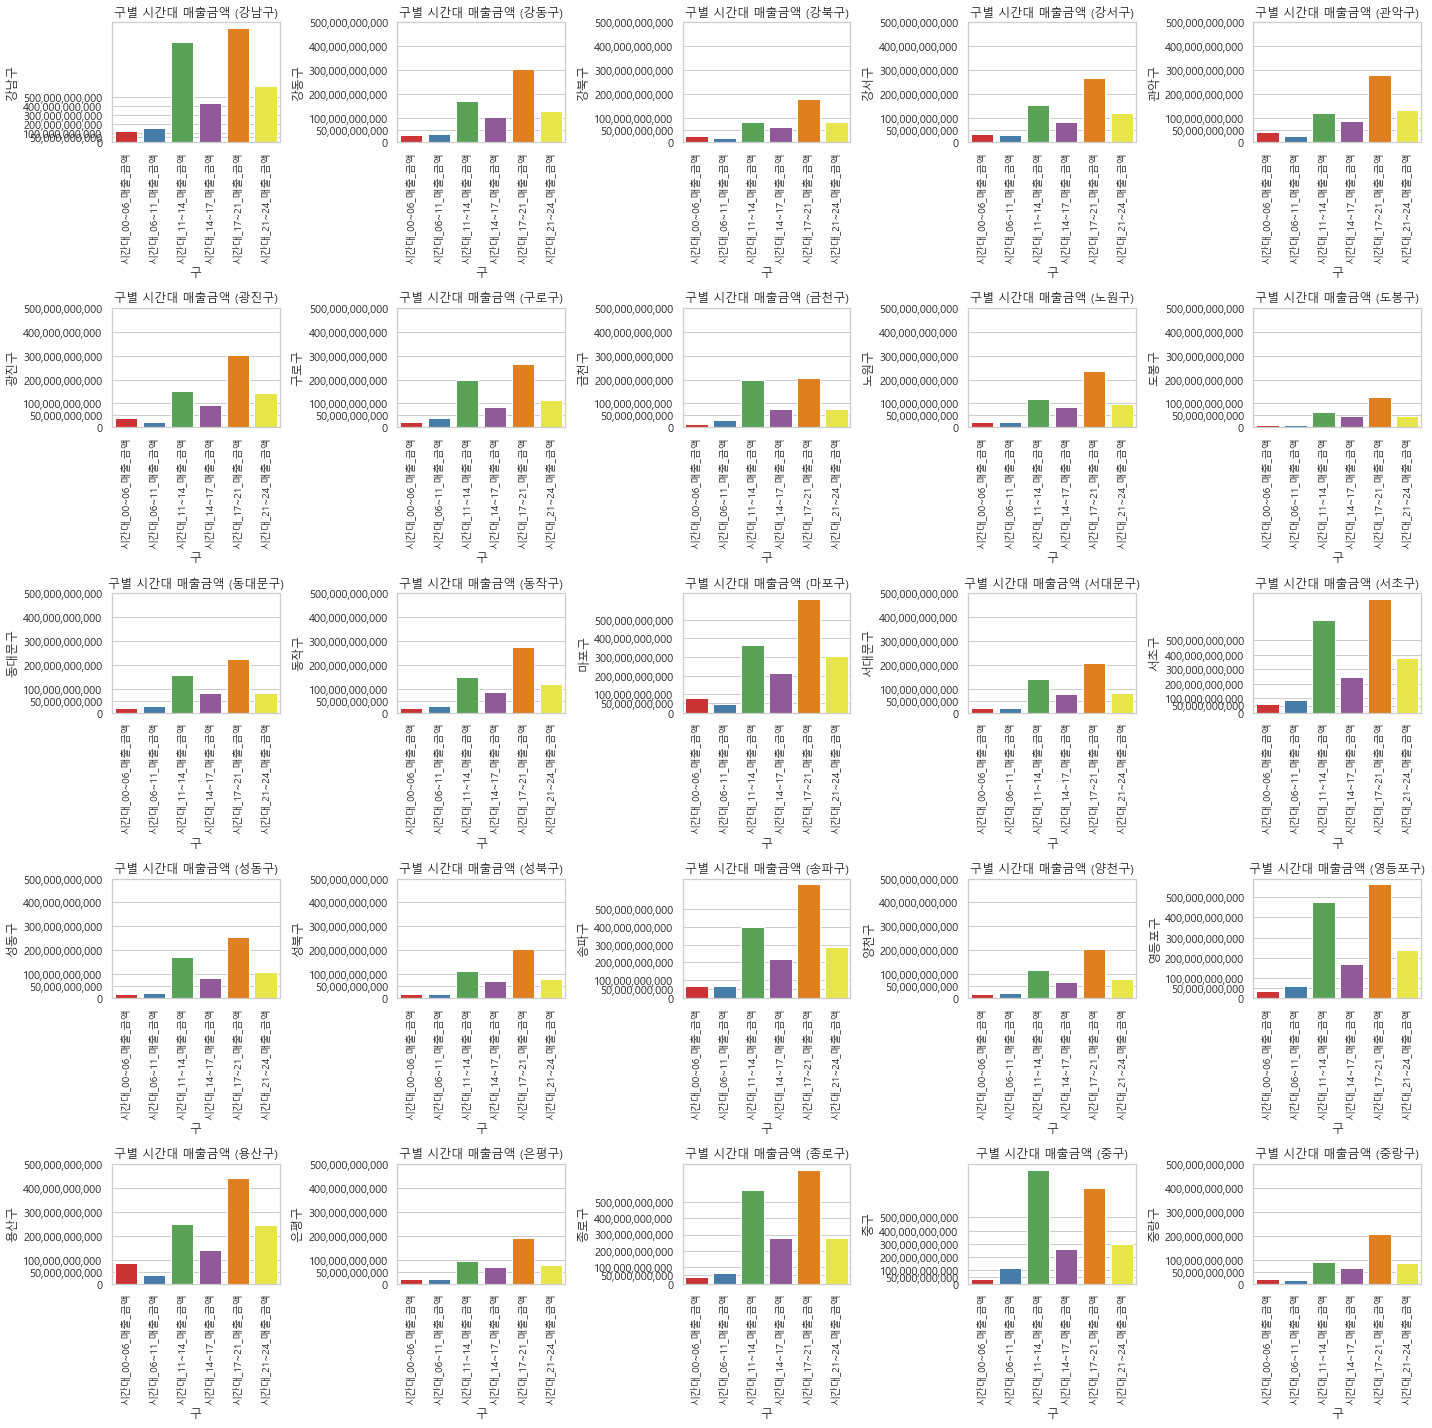

In [44]:
b= a.columns[1:]

# 그래프 그리기
plt.figure(figsize=(20, 20))  # 전체 그래프 크기 조정

for i in range(25):
    ax = plt.subplot(5, 5, i+1)  # 서브플롯 선택
    sns.barplot(x='index', y=b[i], data=a, ci=None, ax=ax, palette="Set1")
    ax.set_title(f'구별 시간대 매출금액 ({b[i]})')
    ax.set_xlabel('구', fontsize=12)
    ax.set_ylabel(f'{b[i]}', fontsize=12)
    
    # y축 눈금 고정 설정
    y_ticks = [0,50000000000,100000000000,200000000000,300000000000,400000000000,500000000000]
    ax.set_yticks(y_ticks)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# 전체 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

# 25개 구별, 연령대별, 매출

In [45]:
df3.head()

,Unnamed: 0,Unnamed: 0.1,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,시군구_코드,업종별_점포당_매출_금액
0,0,0,202203,강남구,CS100001,한식,3.607718,1,116,145,...,3665.0,0.0,971.0,2520.0,1320.0,763.0,502,5.0,11680,9.851762e+07
1,1,1,202203,강남구,CS100001,한식,3.607718,1,116,145,...,45424.0,411.0,22326.0,36148.0,25579.0,19526.0,13097,90.0,11680,7.882209e+07
2,2,2,202203,강남구,CS100001,한식,3.607718,1,116,145,...,13583.0,1904.0,2851.0,6489.0,11369.0,8908.0,2904,33.0,11680,4.408173e+07
3,3,3,202203,강남구,CS100001,한식,3.607718,1,116,145,...,37861.0,516.0,25510.0,36477.0,22180.0,13662.0,6316,91.0,11680,5.280214e+07
4,4,4,202203,강남구,CS100001,한식,3.607718,1,116,145,...,198873.0,5225.0,92276.0,142044.0,117282.0,100271.0,67313,252.0,11680,9.441766e+07


In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35853 entries, 0 to 35852
Columns: 101 entries, Unnamed: 0 to 업종별_점포당_매출_금액
dtypes: float64(59), int64(35), object(7)
memory usage: 27.6+ MB


In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35853 entries, 0 to 35852
Columns: 101 entries, Unnamed: 0 to 업종별_점포당_매출_금액
dtypes: float64(59), int64(35), object(7)
memory usage: 27.6+ MB


In [48]:
a=df3.groupby('시군구명')[['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액']].sum().reset_index()
a = a.set_index("시군구명")
a = a.T.reset_index()
a

시군구명,index,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,연령대_10_매출_금액,2.401899e+10,8.041996e+09,3.712867e+09,4.098799e+09,7.036679e+09,1.106230e+10,3.714787e+09,1.802190e+09,9.996300e+09,...,6.275675e+09,9.281576e+09,1.314621e+10,5.209027e+09,5.655875e+09,7.581010e+09,5.749766e+09,1.217522e+10,8.793657e+09,3.855160e+09
1,연령대_20_매출_금액,5.637674e+11,1.083754e+11,7.321856e+10,8.995915e+10,1.823702e+11,1.906086e+11,1.148881e+11,8.280863e+10,9.958509e+10,...,1.455986e+11,1.062818e+11,2.947000e+11,6.009227e+10,2.201811e+11,3.022087e+11,7.241678e+10,3.541633e+11,3.144042e+11,6.741948e+10
2,연령대_30_매출_금액,8.262386e+11,1.532085e+11,8.473179e+10,1.446891e+11,1.630147e+11,1.563070e+11,1.674381e+11,1.274769e+11,1.035135e+11,...,1.350798e+11,8.748628e+10,3.870357e+11,8.954934e+10,3.427107e+11,3.178725e+11,8.740706e+10,4.016571e+11,4.668884e+11,9.301751e+10
3,연령대_40_매출_금액,5.949393e+11,1.679872e+11,9.282513e+10,1.359671e+11,1.039668e+11,1.226197e+11,1.369880e+11,1.139296e+11,1.269084e+11,...,9.883824e+10,9.688259e+10,3.073952e+11,1.164151e+11,2.491594e+11,1.574235e+11,9.803962e+10,3.062906e+11,3.893564e+11,9.172939e+10
4,연령대_50_매출_금액,4.249460e+11,1.552089e+11,9.755453e+10,1.248583e+11,1.085101e+11,1.229306e+11,1.272604e+11,1.094383e+11,1.310224e+11,...,9.960259e+10,1.059511e+11,2.517474e+11,1.091511e+11,2.084338e+11,1.265139e+11,1.035429e+11,2.774105e+11,3.054690e+11,1.115872e+11
5,연령대_60_이상_매출_금액,2.538956e+11,1.158288e+11,7.164231e+10,9.002632e+10,7.694114e+10,7.724297e+10,8.330076e+10,6.476986e+10,7.500268e+10,...,6.214851e+10,6.330365e+10,1.804639e+11,7.007935e+10,1.310620e+11,7.128438e+10,7.896482e+10,2.136583e+11,1.919477e+11,8.906539e+10


In [49]:
b= ['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액']

In [50]:
a.columns

Index(['index', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='시군구명')

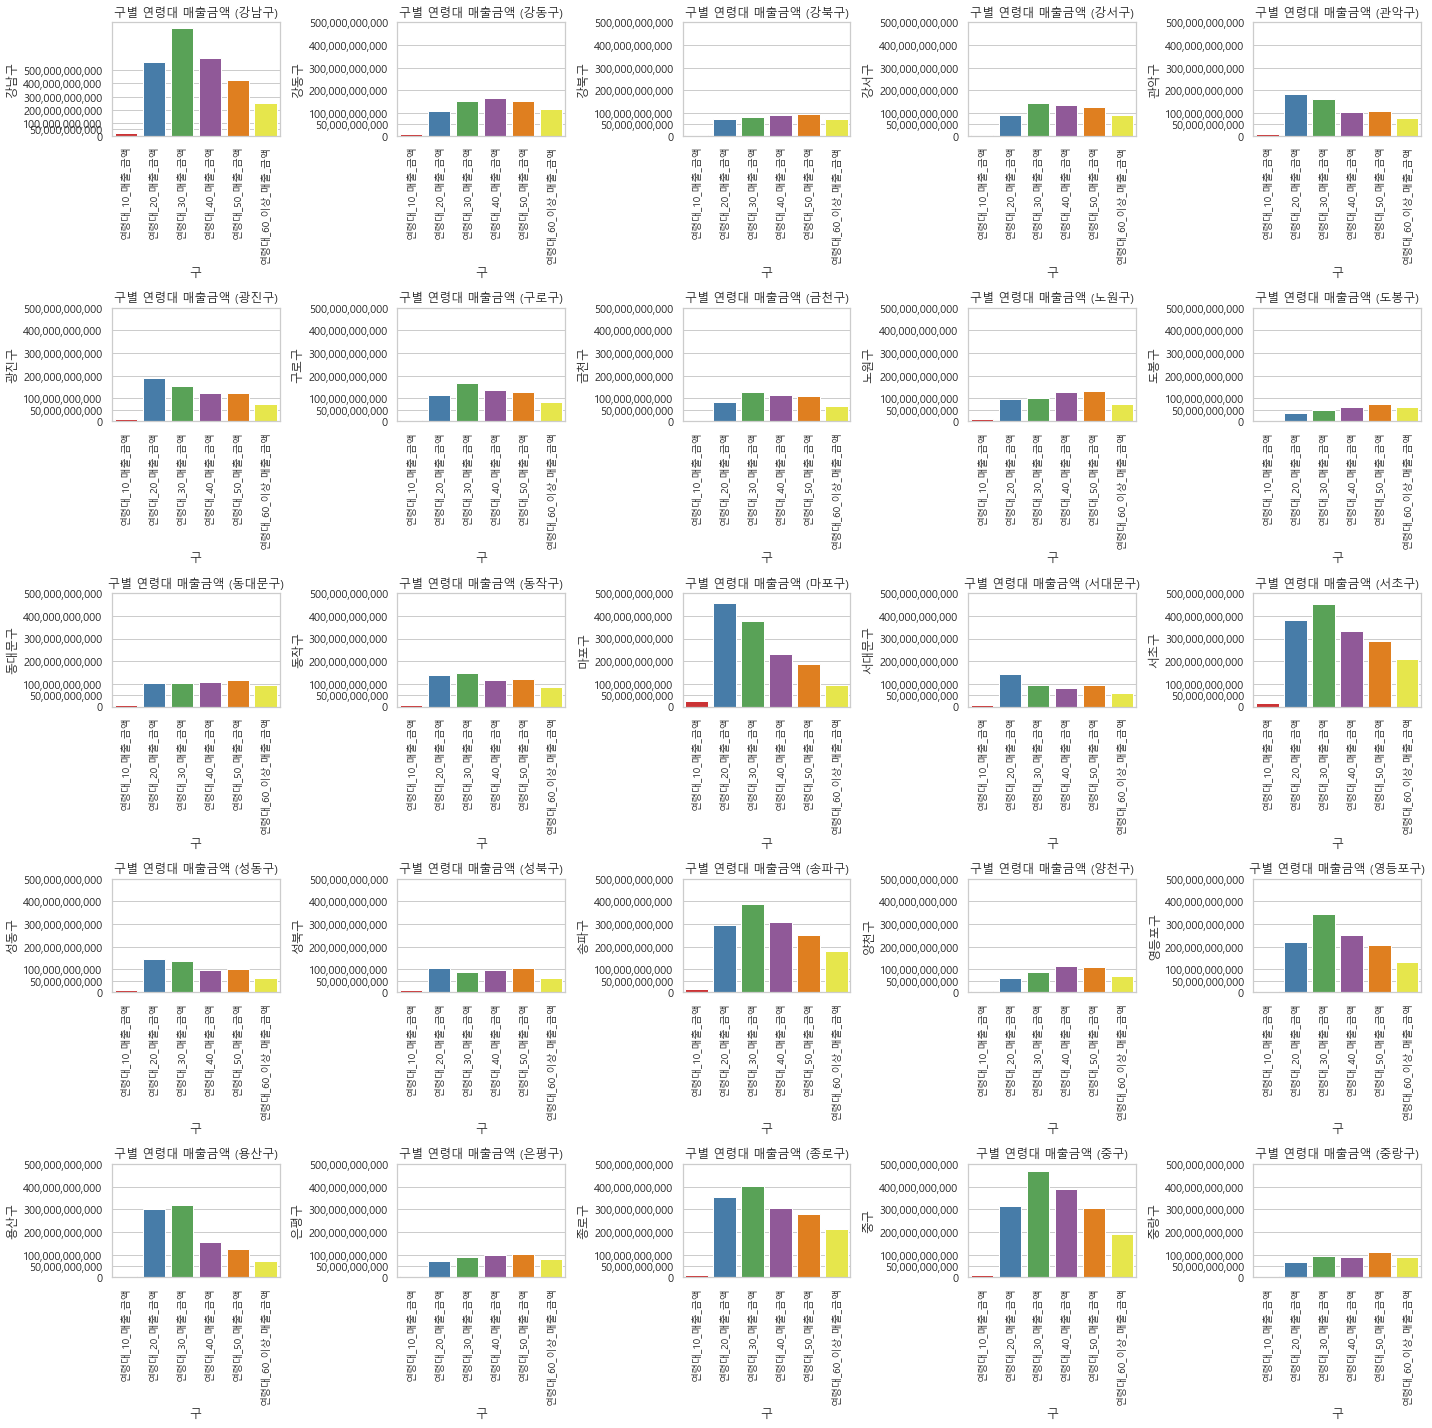

In [51]:
b= a.columns[1:]

# 그래프 그리기
plt.figure(figsize=(20, 20))  # 전체 그래프 크기 조정

for i in range(25):
    ax = plt.subplot(5, 5, i+1)  # 서브플롯 선택
    sns.barplot(x='index', y=b[i], data=a, ci=None, ax=ax, palette="Set1")
    ax.set_title(f'구별 연령대 매출금액 ({b[i]})')
    ax.set_xlabel('구', fontsize=12)
    ax.set_ylabel(f'{b[i]}', fontsize=12)
    
    # y축 눈금 고정 설정
    y_ticks = [0,50000000000,100000000000,200000000000,300000000000,400000000000,500000000000]
    ax.set_yticks(y_ticks)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# 전체 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

# 구별, 업종, 점포수

In [52]:
a=df3.groupby('시군구명')['점포수'].sum().reset_index()
a

,시군구명,점포수
0,강남구,49041.5
1,강동구,17459.5
2,강북구,11062.0
3,강서구,18673.0
4,관악구,16712.0
5,광진구,16467.5
6,구로구,16396.0
7,금천구,13208.5
8,노원구,12005.0
9,도봉구,8534.5


In [53]:
a=df3.groupby(['시군구명','서비스업종'])['점포수'].sum().reset_index()
a

,시군구명,서비스업종,점포수
0,강남구,기타 외국식,4522.5
1,강남구,분식,6394.5
2,강남구,일식,3205.5
3,강남구,제과제빵,1655.0
4,강남구,주점,2257.0
...,...,...,...
245,중랑구,중식,278.0
246,중랑구,치킨,537.5
247,중랑구,커피,1310.0
248,중랑구,패스트푸드,319.5


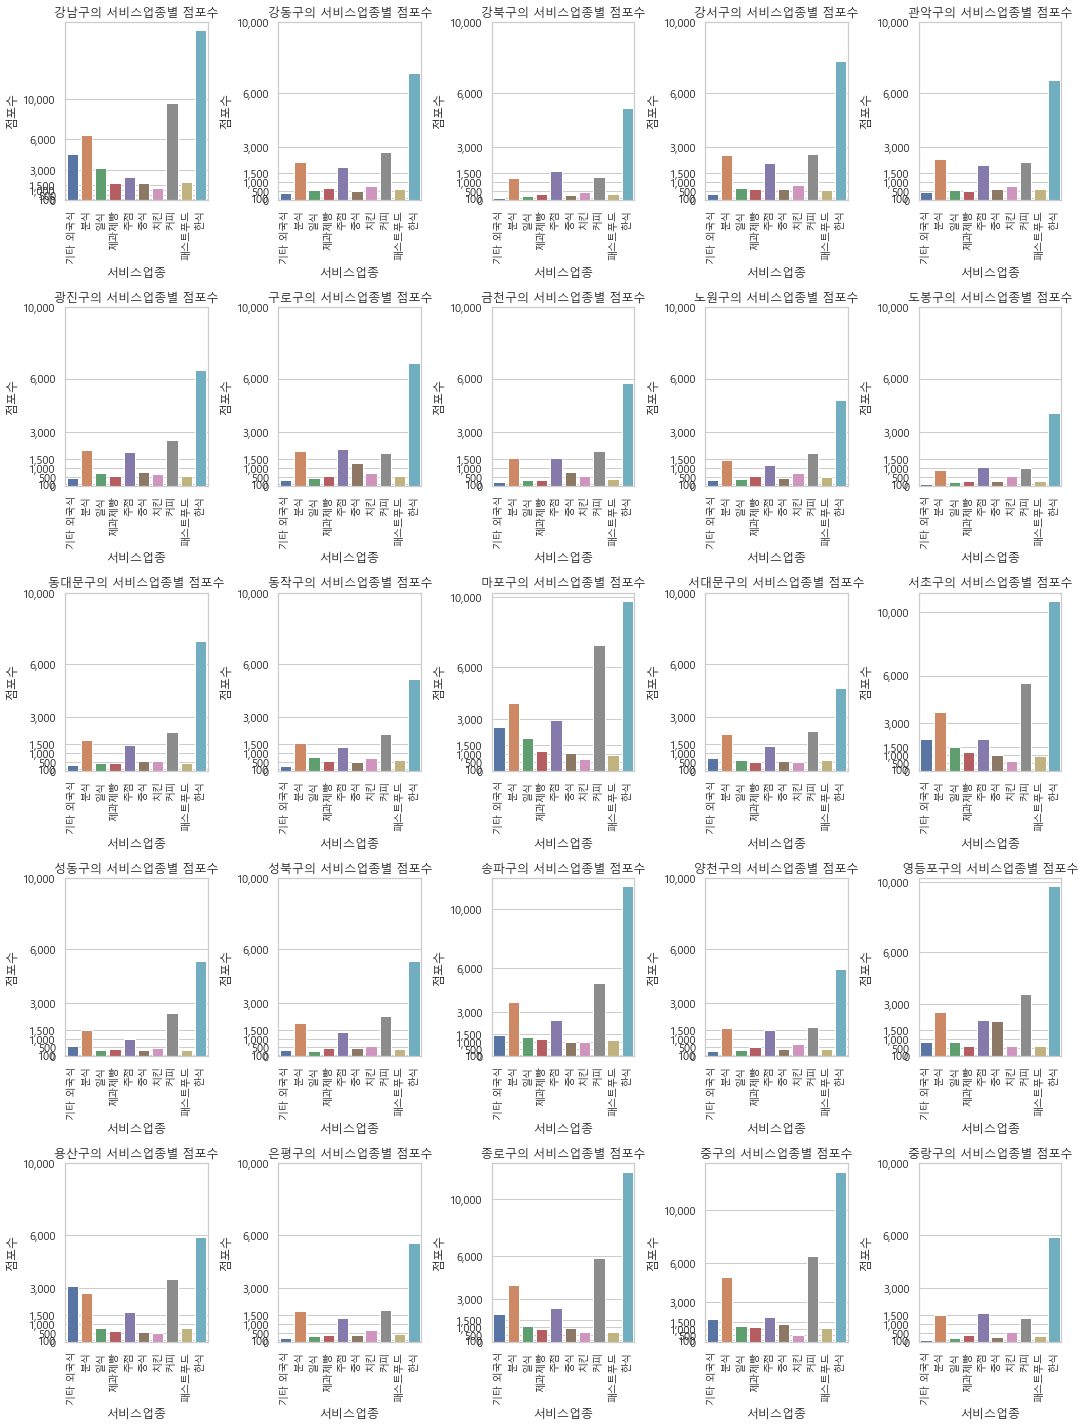

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(15, 20))  # 그래프 크기 조정

# 25개 시군구명 선택 (이 예시에서는 처음 25개를 선택)
selected_sigu = a['시군구명'].unique()[:25]

for i, sigu in enumerate(selected_sigu):
    ax = plt.subplot(5, 5, i+1)  # 서브플롯 선택
    data_subset = a[a['시군구명'] == sigu]
    sns.barplot(x='서비스업종', y='점포수', data=data_subset, ci=None, ax=ax)
    ax.set_title(f'{sigu}의 서비스업종별 점포수')
    ax.set_xlabel('서비스업종', fontsize=12)
    ax.set_ylabel('점포수', fontsize=12)
    
    # y축 눈금 고정 설정
    y_ticks = [0,100,500,1000,1500,3000,6000,10000]
    ax.set_yticks(y_ticks)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# 전체 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

# 점포수 - 매출 상관관계

# 매출 건수 - 매출 금액 상관관계
# 객단가(금액/건수)

# 구, 상권구분, 업종

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35853 entries, 0 to 35852
Columns: 101 entries, Unnamed: 0 to 업종별_점포당_매출_금액
dtypes: float64(59), int64(35), object(7)
memory usage: 27.6+ MB


In [56]:
df3.head()

,Unnamed: 0,Unnamed: 0.1,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,시군구_코드,업종별_점포당_매출_금액
0,0,0,202203,강남구,CS100001,한식,3.607718,1,116,145,...,3665.0,0.0,971.0,2520.0,1320.0,763.0,502,5.0,11680,9.851762e+07
1,1,1,202203,강남구,CS100001,한식,3.607718,1,116,145,...,45424.0,411.0,22326.0,36148.0,25579.0,19526.0,13097,90.0,11680,7.882209e+07
2,2,2,202203,강남구,CS100001,한식,3.607718,1,116,145,...,13583.0,1904.0,2851.0,6489.0,11369.0,8908.0,2904,33.0,11680,4.408173e+07
3,3,3,202203,강남구,CS100001,한식,3.607718,1,116,145,...,37861.0,516.0,25510.0,36477.0,22180.0,13662.0,6316,91.0,11680,5.280214e+07
4,4,4,202203,강남구,CS100001,한식,3.607718,1,116,145,...,198873.0,5225.0,92276.0,142044.0,117282.0,100271.0,67313,252.0,11680,9.441766e+07


In [57]:
# 구, 상권구분, 매출
a=df3.groupby(['시군구명','상권_구분_코드_명'])['분기당_매출_금액'].sum().reset_index()
a

,시군구명,상권_구분_코드_명,분기당_매출_금액
0,강남구,골목상권,244051297081
1,강남구,관광특구,158898907168
2,강남구,발달상권,3191872724316
3,강남구,전통시장,101315514843
4,강동구,골목상권,266168406667
5,강동구,발달상권,403474700130
6,강동구,전통시장,100418364760
7,강북구,골목상권,165365898261
8,강북구,발달상권,222032506455
9,강북구,전통시장,62160793297


In [58]:
a=df3.groupby(['시군구명','상권_구분_코드_명','서비스업종'])['점포수','분기당_매출_금액'].sum()
a

점포수    분기당_매출_금액
시군구명 상권_구분_코드_명 서비스업종                      
강남구  골목상권       기타 외국식   218.5   8019940529
                분식       548.5  14187997874
                일식       171.5   9952065121
                제과제빵     128.0   5056269717
                주점       205.0  12118587927
...                        ...          ...
중랑구  전통시장       중식        36.0   1724581146
                치킨        89.0   2485872408
                커피       154.0   3748563470
                패스트푸드     19.5    897337581
                한식      1259.0  72468332207

[790 rows x 2 columns]

# 업종별 점포당 매출 금액

# 업종별 점포 1개당 매출금액 = 분기당_매출_금액 / 점포수 

In [59]:
# 분기당_매출_금액 / 점포수 = 업종별 점포 1개당 매출금액
a['업종별_점포당_매출_금액'] = a['분기당_매출_금액'] / a['점포수']
a['업종별_점포당_매출_금액'].to_frame()

업종별_점포당_매출_금액
시군구명 상권_구분_코드_명 서비스업종                
강남구  골목상권       기타 외국식   3.670453e+07
                분식       2.586691e+07
                일식       5.802953e+07
                제과제빵     3.950211e+07
                주점       5.911506e+07
...                               ...
중랑구  전통시장       중식       4.790503e+07
                치킨       2.793115e+07
                커피       2.434132e+07
                패스트푸드    4.601731e+07
                한식       5.756023e+07

[790 rows x 1 columns]

In [60]:
a['업종별_점포당_매출_금액']=a['업종별_점포당_매출_금액'].astype(np.int64)
a['업종별_점포당_매출_금액'].to_frame()

업종별_점포당_매출_금액
시군구명 상권_구분_코드_명 서비스업종                
강남구  골목상권       기타 외국식       36704533
                분식           25866905
                일식           58029534
                제과제빵         39502107
                주점           59115063
...                               ...
중랑구  전통시장       중식           47905031
                치킨           27931150
                커피           24341321
                패스트푸드        46017311
                한식           57560232

[790 rows x 1 columns]

In [61]:
a=a.reset_index()
a

,시군구명,상권_구분_코드_명,서비스업종,점포수,분기당_매출_금액,업종별_점포당_매출_금액
0,강남구,골목상권,기타 외국식,218.5,8019940529,36704533
1,강남구,골목상권,분식,548.5,14187997874,25866905
2,강남구,골목상권,일식,171.5,9952065121,58029534
3,강남구,골목상권,제과제빵,128.0,5056269717,39502107
4,강남구,골목상권,주점,205.0,12118587927,59115063
...,...,...,...,...,...,...
785,중랑구,전통시장,중식,36.0,1724581146,47905031
786,중랑구,전통시장,치킨,89.0,2485872408,27931150
787,중랑구,전통시장,커피,154.0,3748563470,24341321
788,중랑구,전통시장,패스트푸드,19.5,897337581,46017311


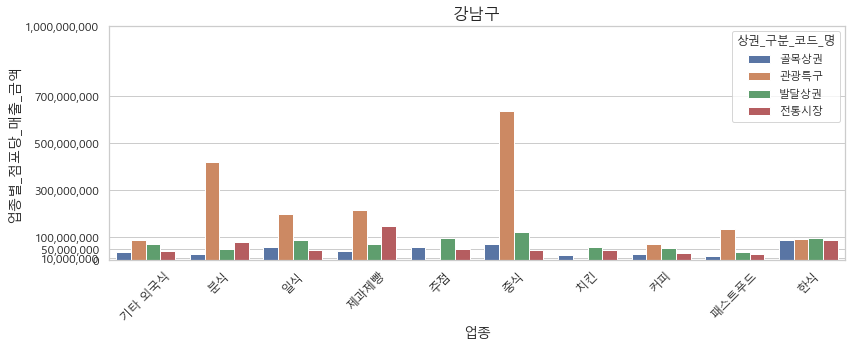

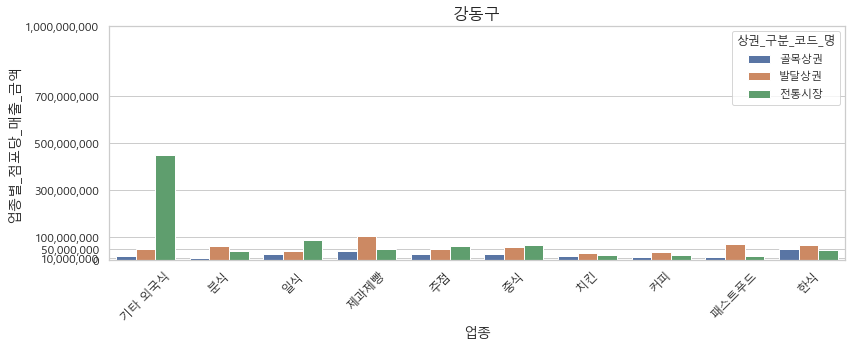

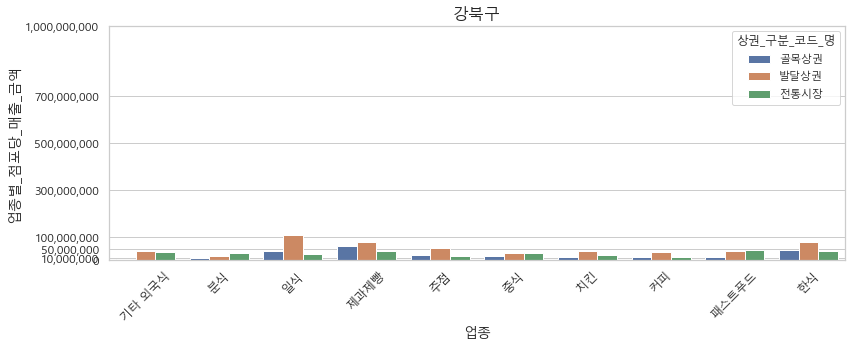

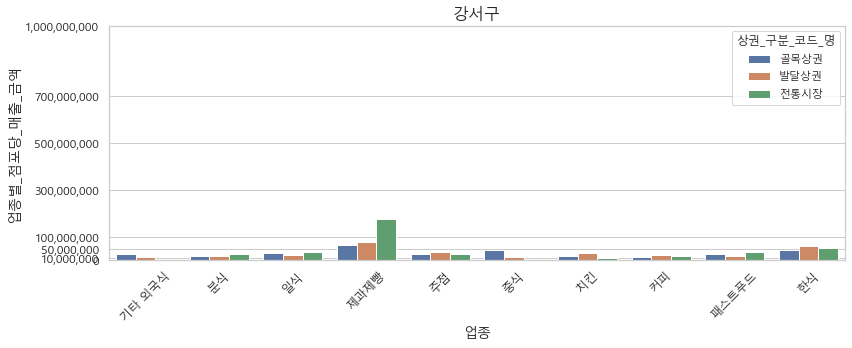

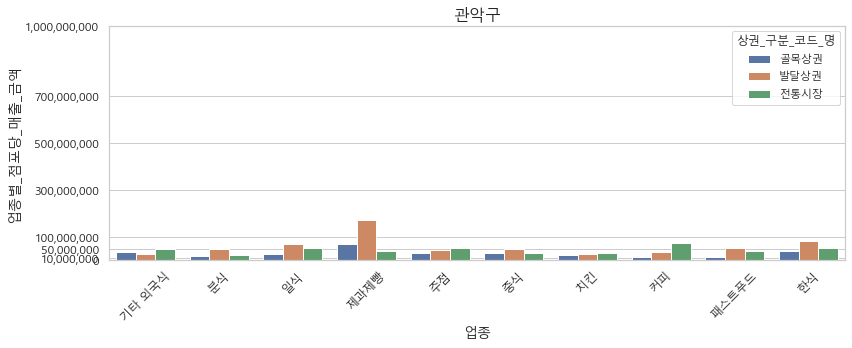

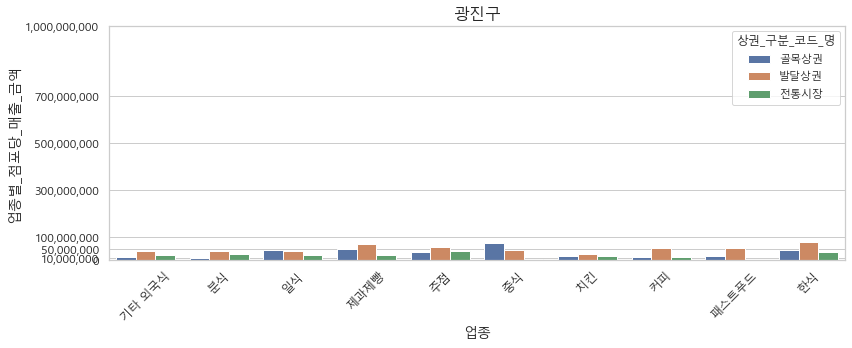

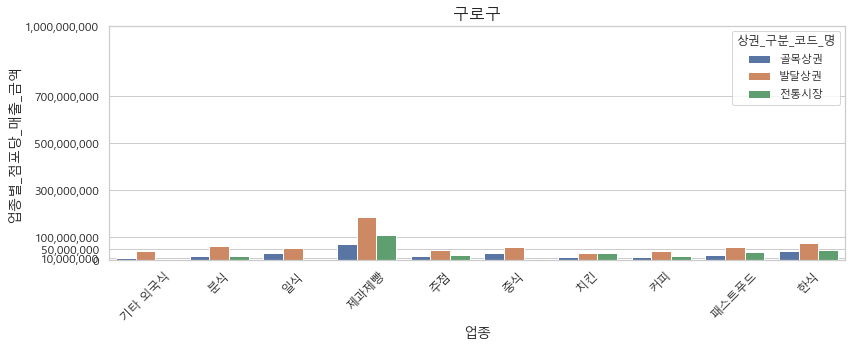

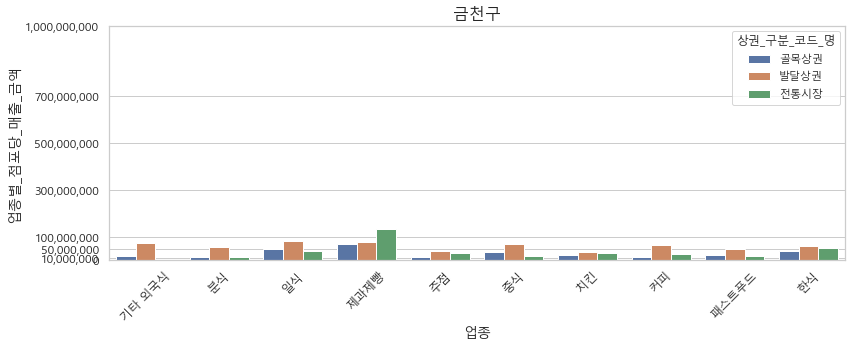

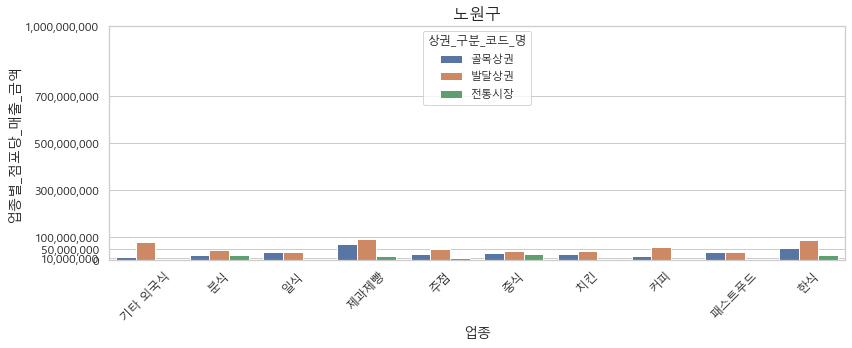

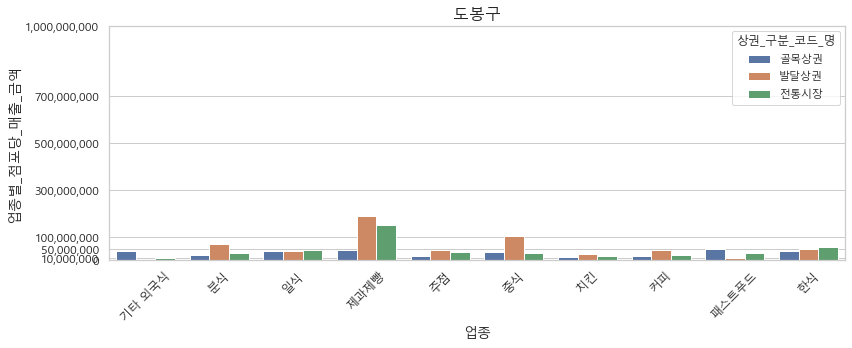

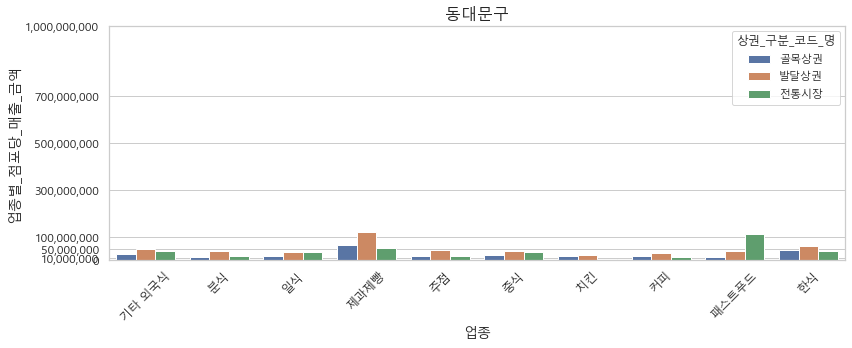

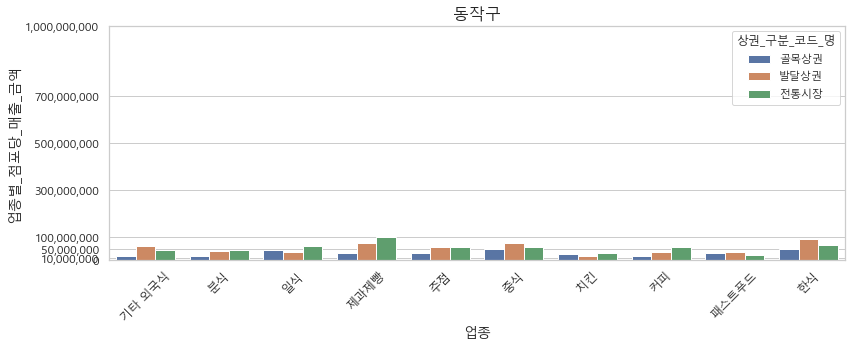

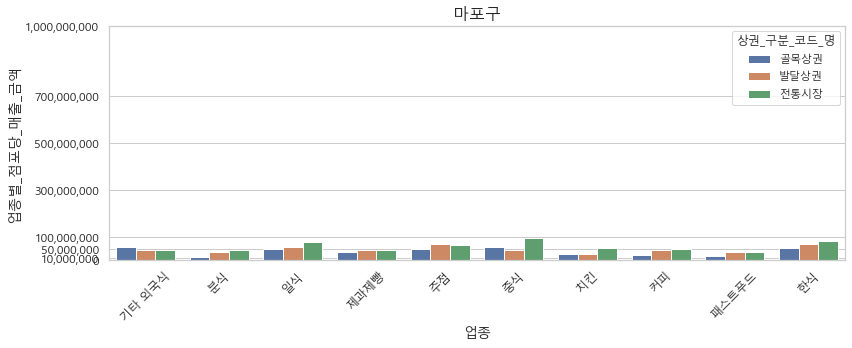

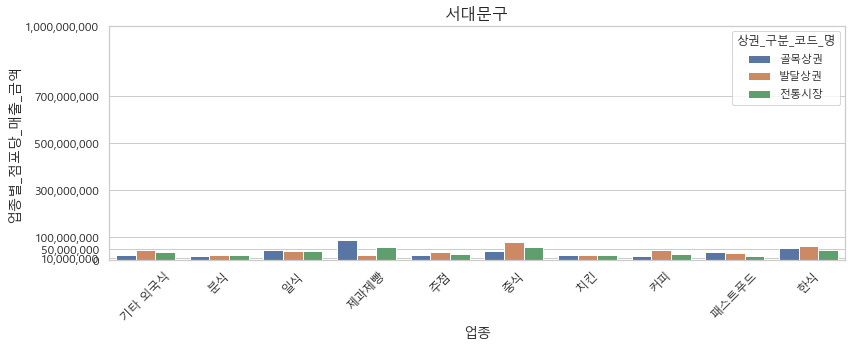

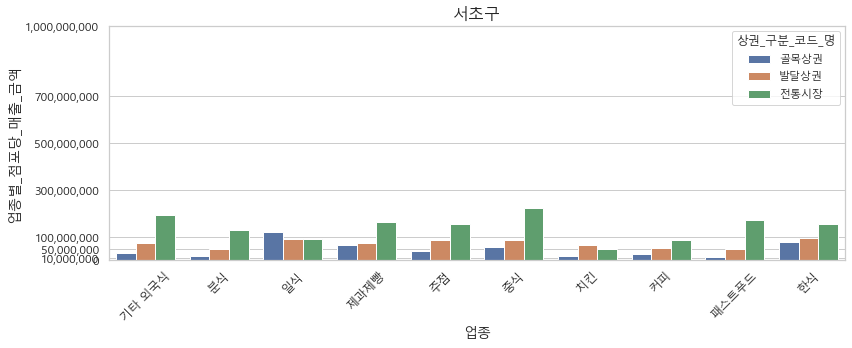

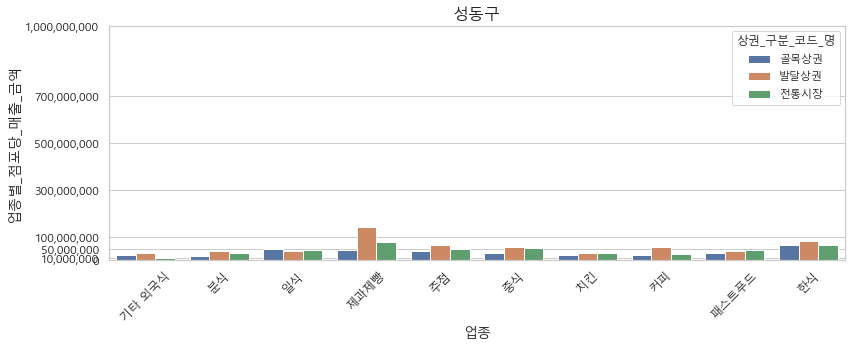

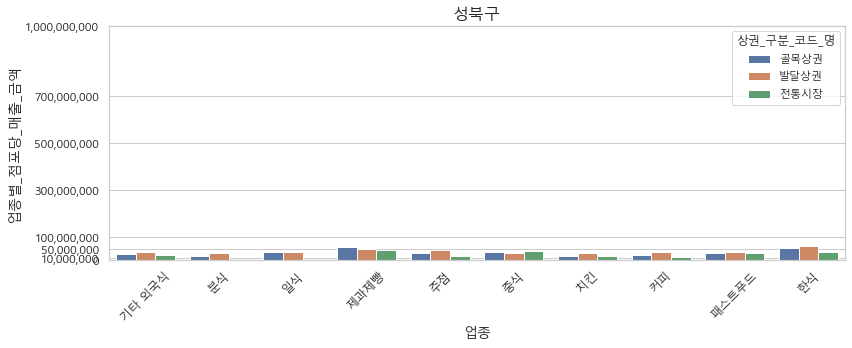

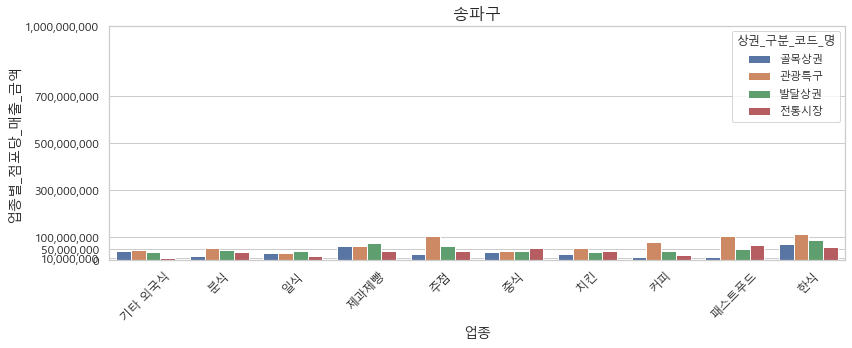

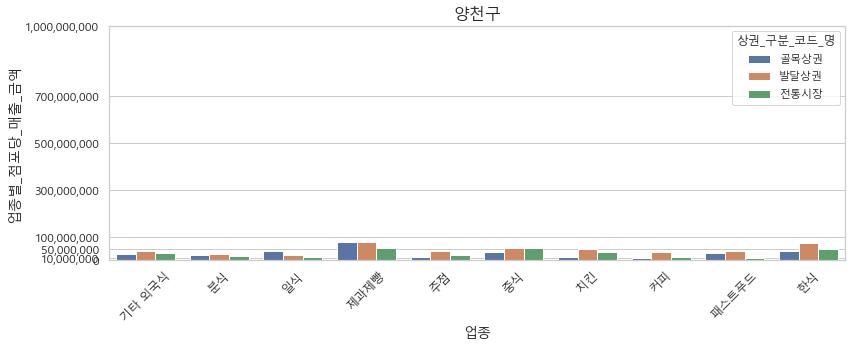

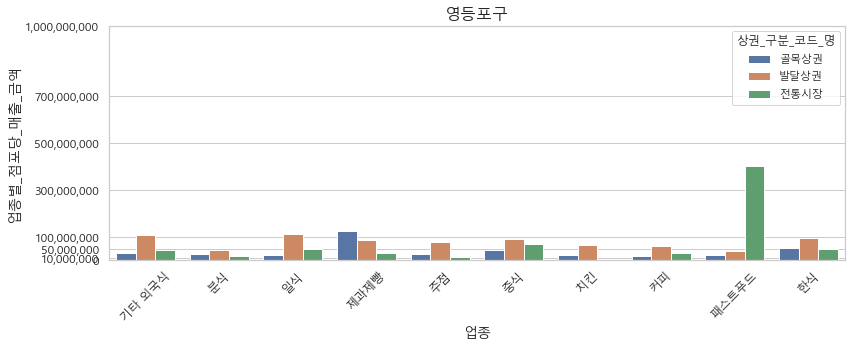

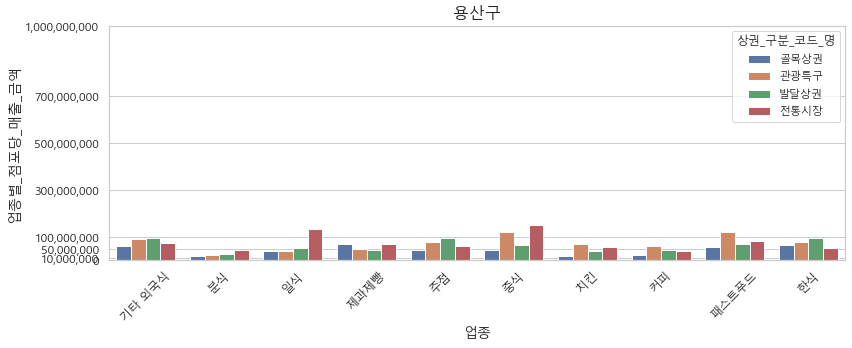

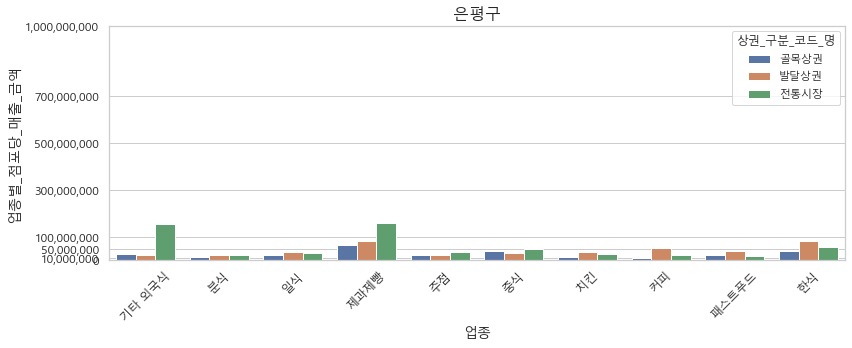

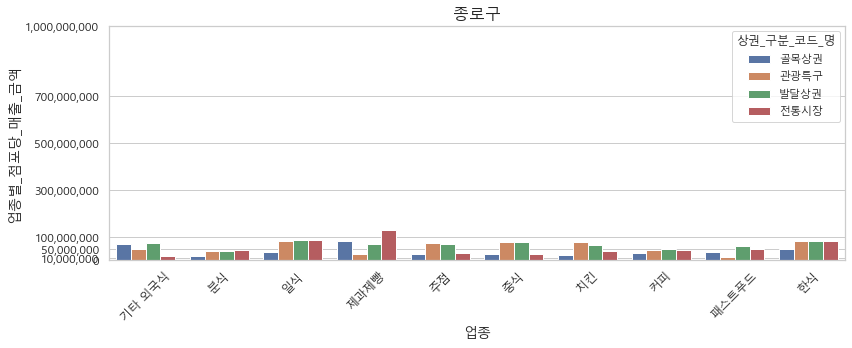

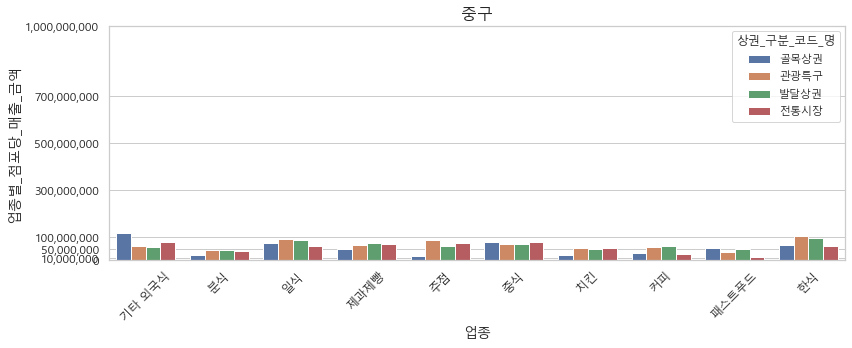

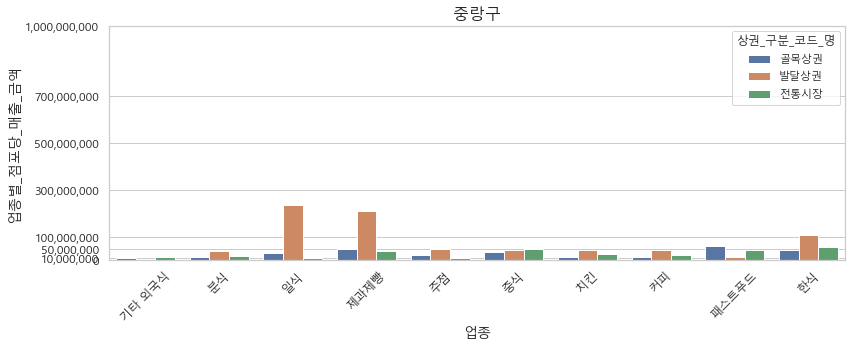

In [62]:
gu=['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

for i in gu:
    a_구=a[a['시군구명']==i]
    a_구

    # 그래프 그리기
    plt.figure(figsize=(12, 5))  # 그래프 크기 조정
    ax = sns.barplot(x='서비스업종', y='업종별_점포당_매출_금액', data=a_구, hue='상권_구분_코드_명', ci=None)

    # y축 눈금 고정 설정
    y_ticks = [0, 10000000, 50000000, 100000000, 300000000, 500000000, 700000000, 1000000000]
    ax.set_yticks(y_ticks)

    # x축 레이블 회전 및 폰트 크기 조정
    plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 조정
    plt.yticks(fontsize=12)  # y축 레이블 폰트 크기 조정

    # y축 값 표현을 천의 자리수 단위로 설정
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

    # x, y축 레이블 및 타이틀 추가
    plt.xlabel('업종', fontsize=14)
    plt.ylabel('업종별_점포당_매출_금액', fontsize=14)
    plt.title(i, fontsize=16)

    # 그래프 표시
    plt.tight_layout()  # 레이아웃 조정
    plt.show()

# 상권구분별 업종별 점포당 매출금액

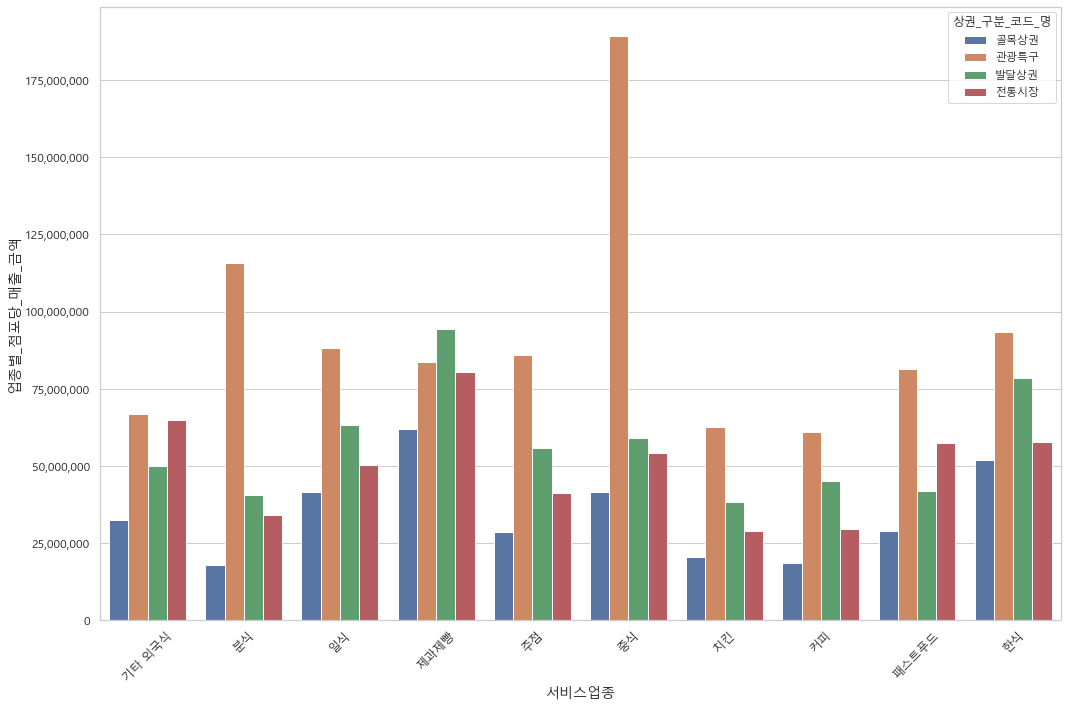

In [63]:
# 그래프 그리기
plt.figure(figsize=(15, 10))  # 그래프 크기 조정
ax = sns.barplot(x='서비스업종', y='업종별_점포당_매출_금액', hue='상권_구분_코드_명',ci=None, data=a)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 조정
plt.yticks(fontsize=12)  # y축 레이블 폰트 크기 조정

# y축 값 표현을 천의 자리수 단위로 설정
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# x, y축 레이블 및 타이틀 추가
plt.xlabel('서비스업종', fontsize=14)
plt.ylabel('업종별_점포당_매출_금액', fontsize=14)
plt.title('', fontsize=16)

# 그래프 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

# 상권구분별 업종별 매출

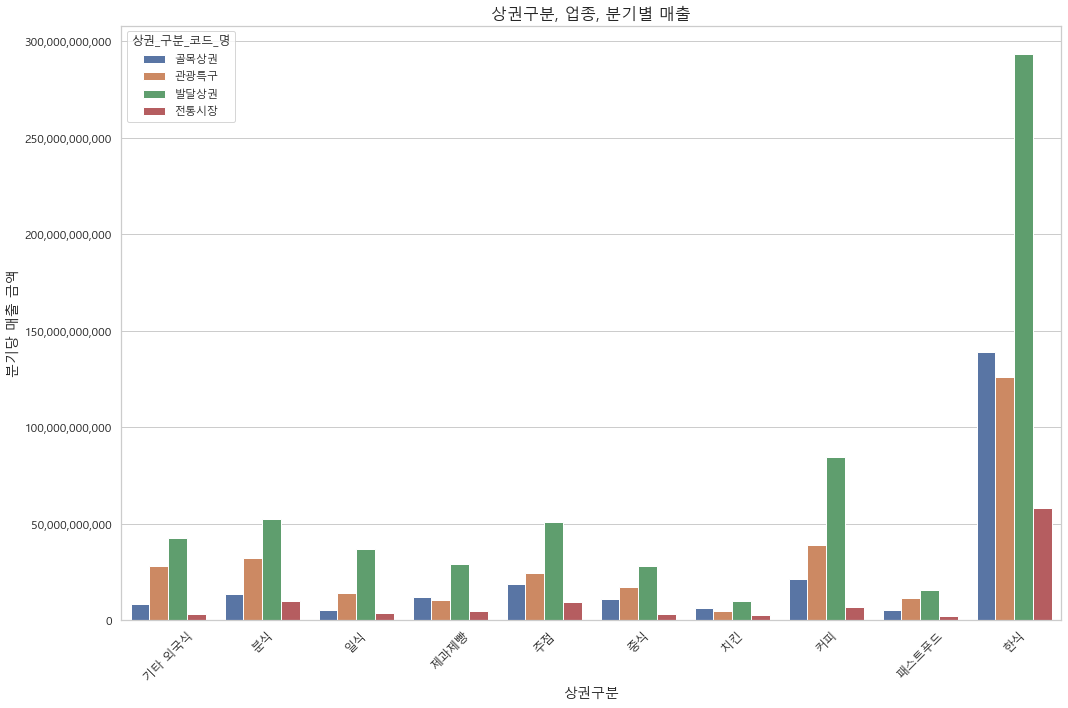

In [64]:
# 그래프 그리기
plt.figure(figsize=(15, 10))  # 그래프 크기 조정
ax = sns.barplot(x='서비스업종', y='분기당_매출_금액', hue='상권_구분_코드_명',ci=None, data=a)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 조정
plt.yticks(fontsize=12)  # y축 레이블 폰트 크기 조정

# y축 값 표현을 천의 자리수 단위로 설정
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# x, y축 레이블 및 타이틀 추가
plt.xlabel('상권구분', fontsize=14)
plt.ylabel('분기당 매출 금액', fontsize=14)
plt.title('상권구분, 업종, 분기별 매출', fontsize=16)

# 그래프 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [65]:
# 상권별, 점포수

In [66]:
df3.groupby('상권_구분_코드_명')['점포수'].sum()

상권_구분_코드_명
골목상권    168273.0
관광특구     19329.0
발달상권    244464.0
전통시장     51795.0
Name: 점포수, dtype: float64